In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv

In [2]:
#const
k = 1.3806504e-23
hb = 1.0545716e-34
h = (2.0*np.pi*1.0545716e-34) 
c = 2.9979246e+8
#some functions
def readSp(specName, delimiter):
    x = np.array([])
    y = np.array([])
    with open(specName, newline='') as f:
        fr = csv.reader(f, delimiter=delimiter, quotechar='|')
        ii = 0
        for row in fr:
            ii += 1
            if ii > 33 and ii < 3682:
                y = np.append(y, row[1])
                x = np.append(x, row[0])
                #print(y, x)
    x = x.astype(np.float)
    y = y.astype(np.float)
    out = np.array([[1,1]])
    ii = -1
    for _ in x:
        ii += 1
        out = np.append(out, [[x[ii],y[ii]]], axis = 0)
    out = out[1:]
    return out

In [3]:
#integral of absorbtion
ex = readSp('lolo.csv', ';')
n = 1 / (1.010 * 1e-3)
np.trapz(ex[:,1] * n * 0.1, ex[:,0] * 1e-9)

1.298855649018041e-05

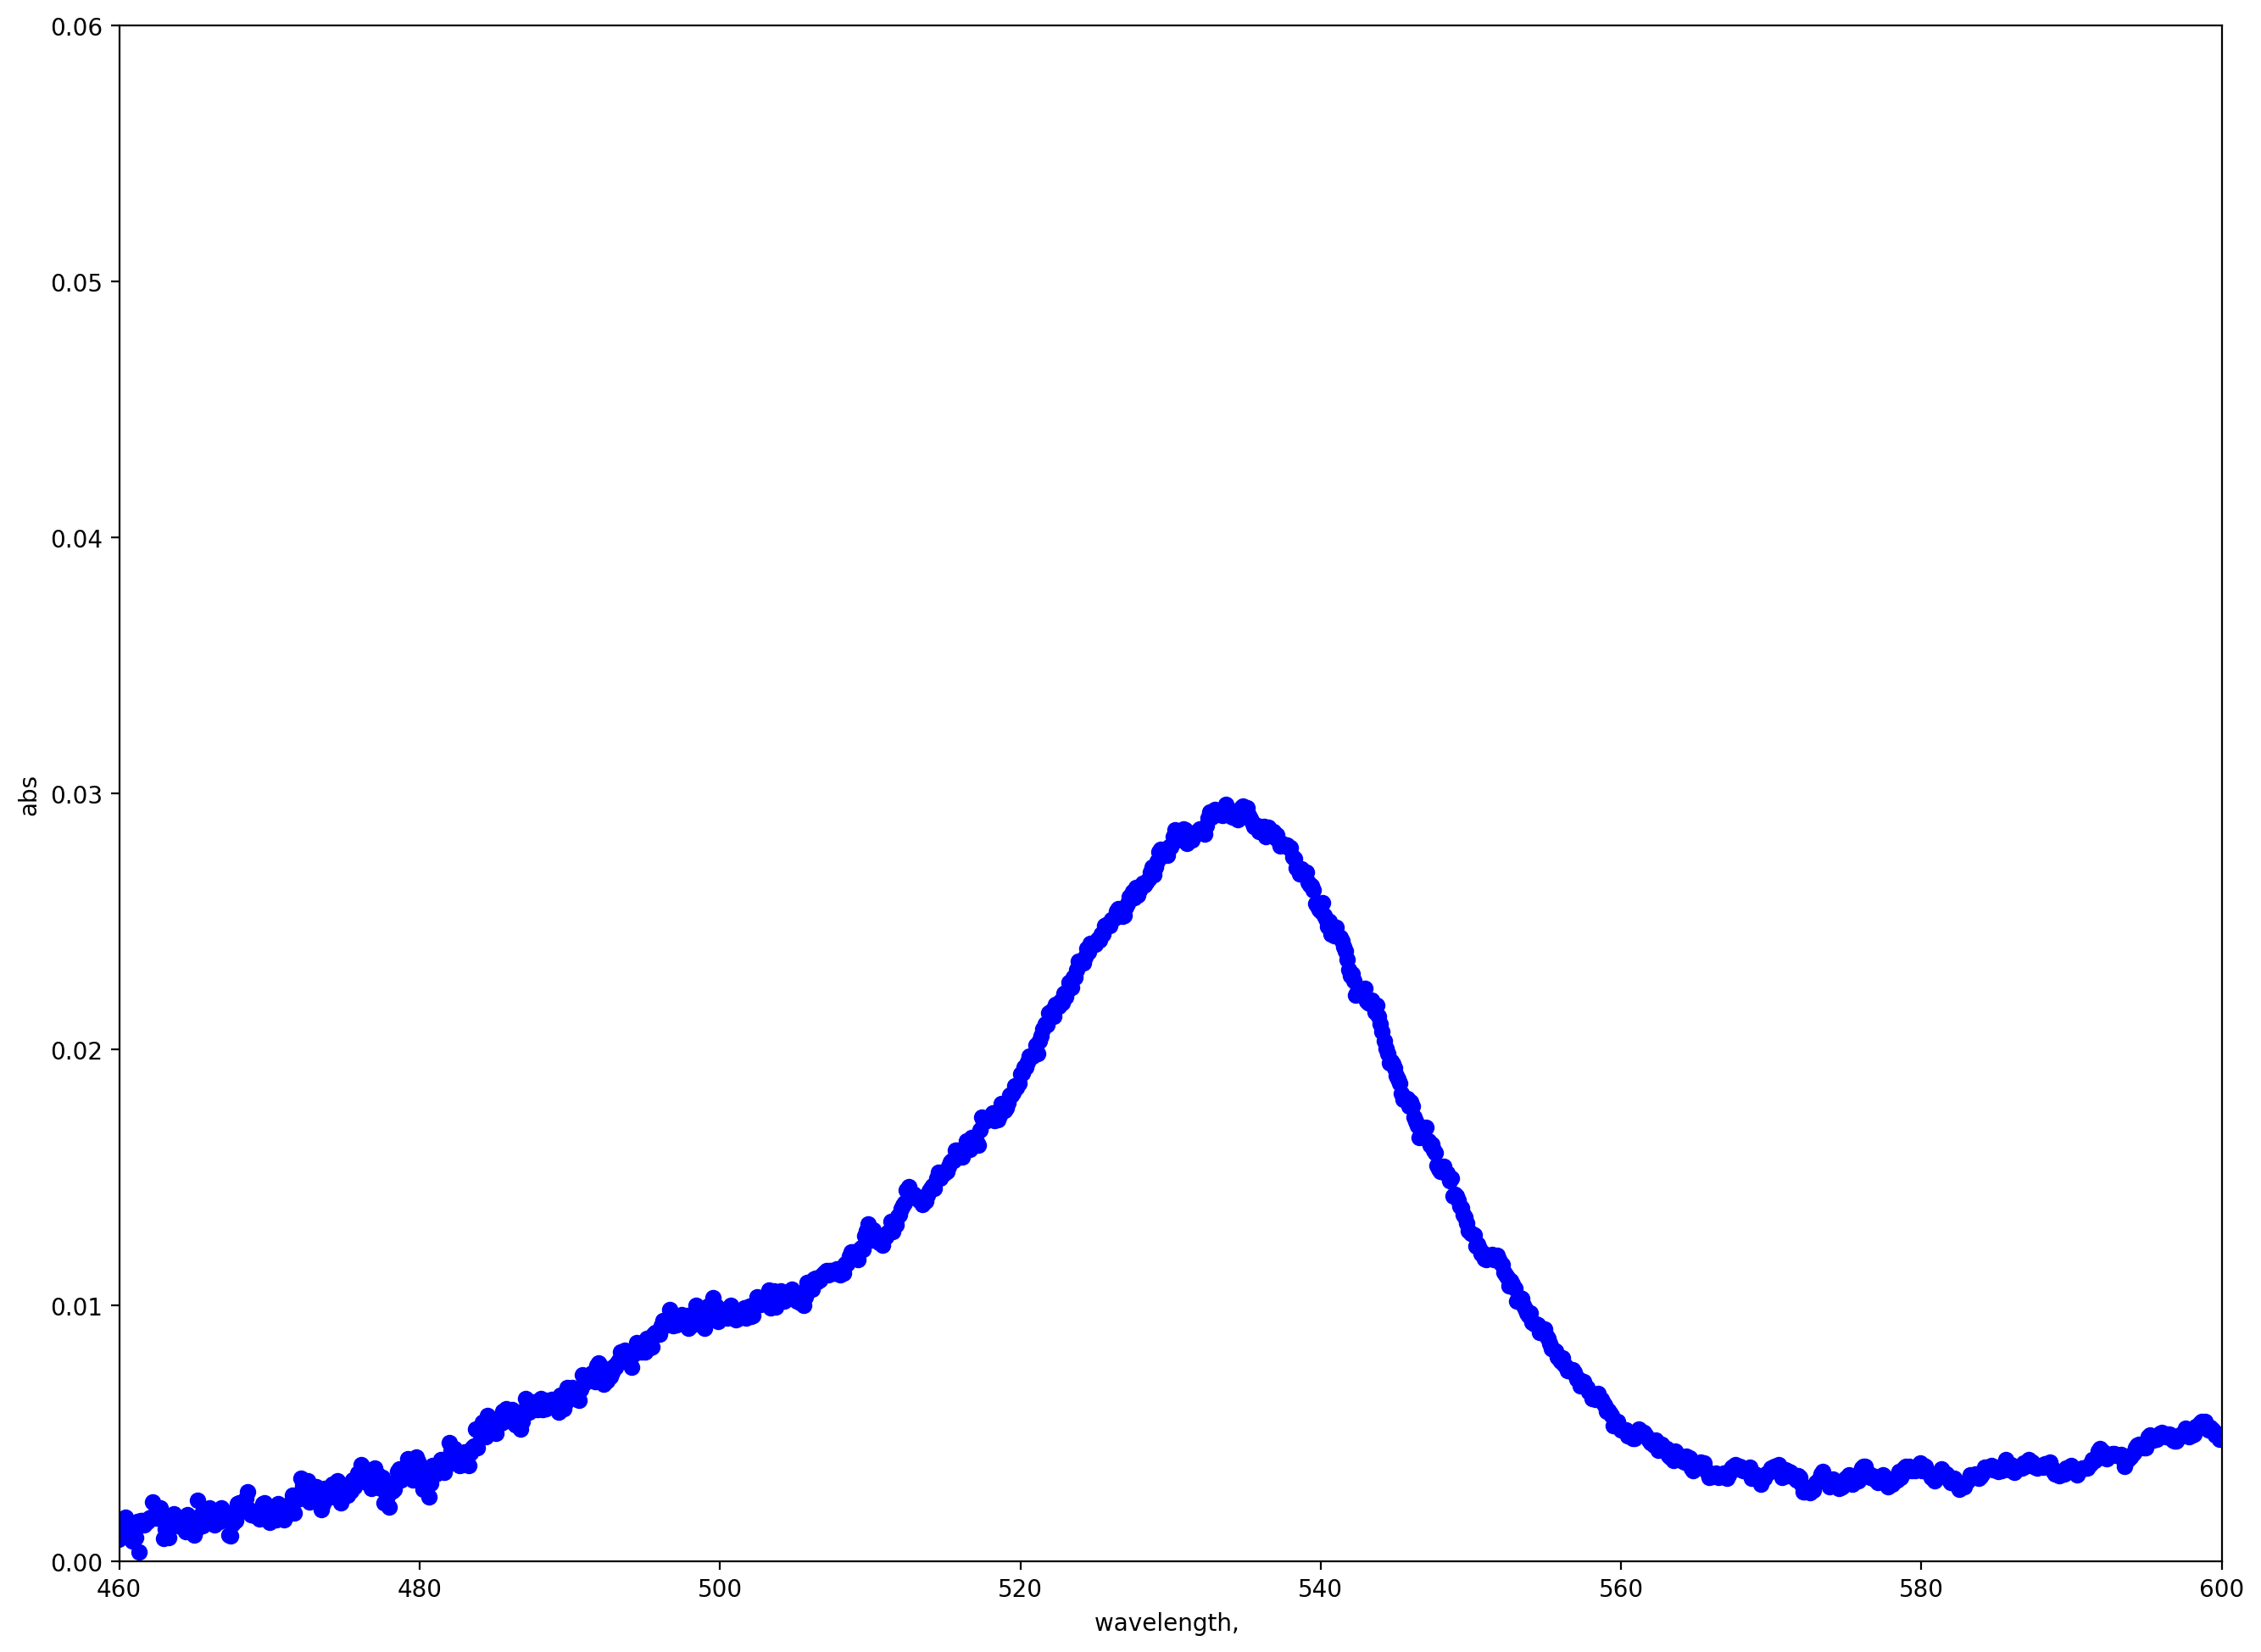

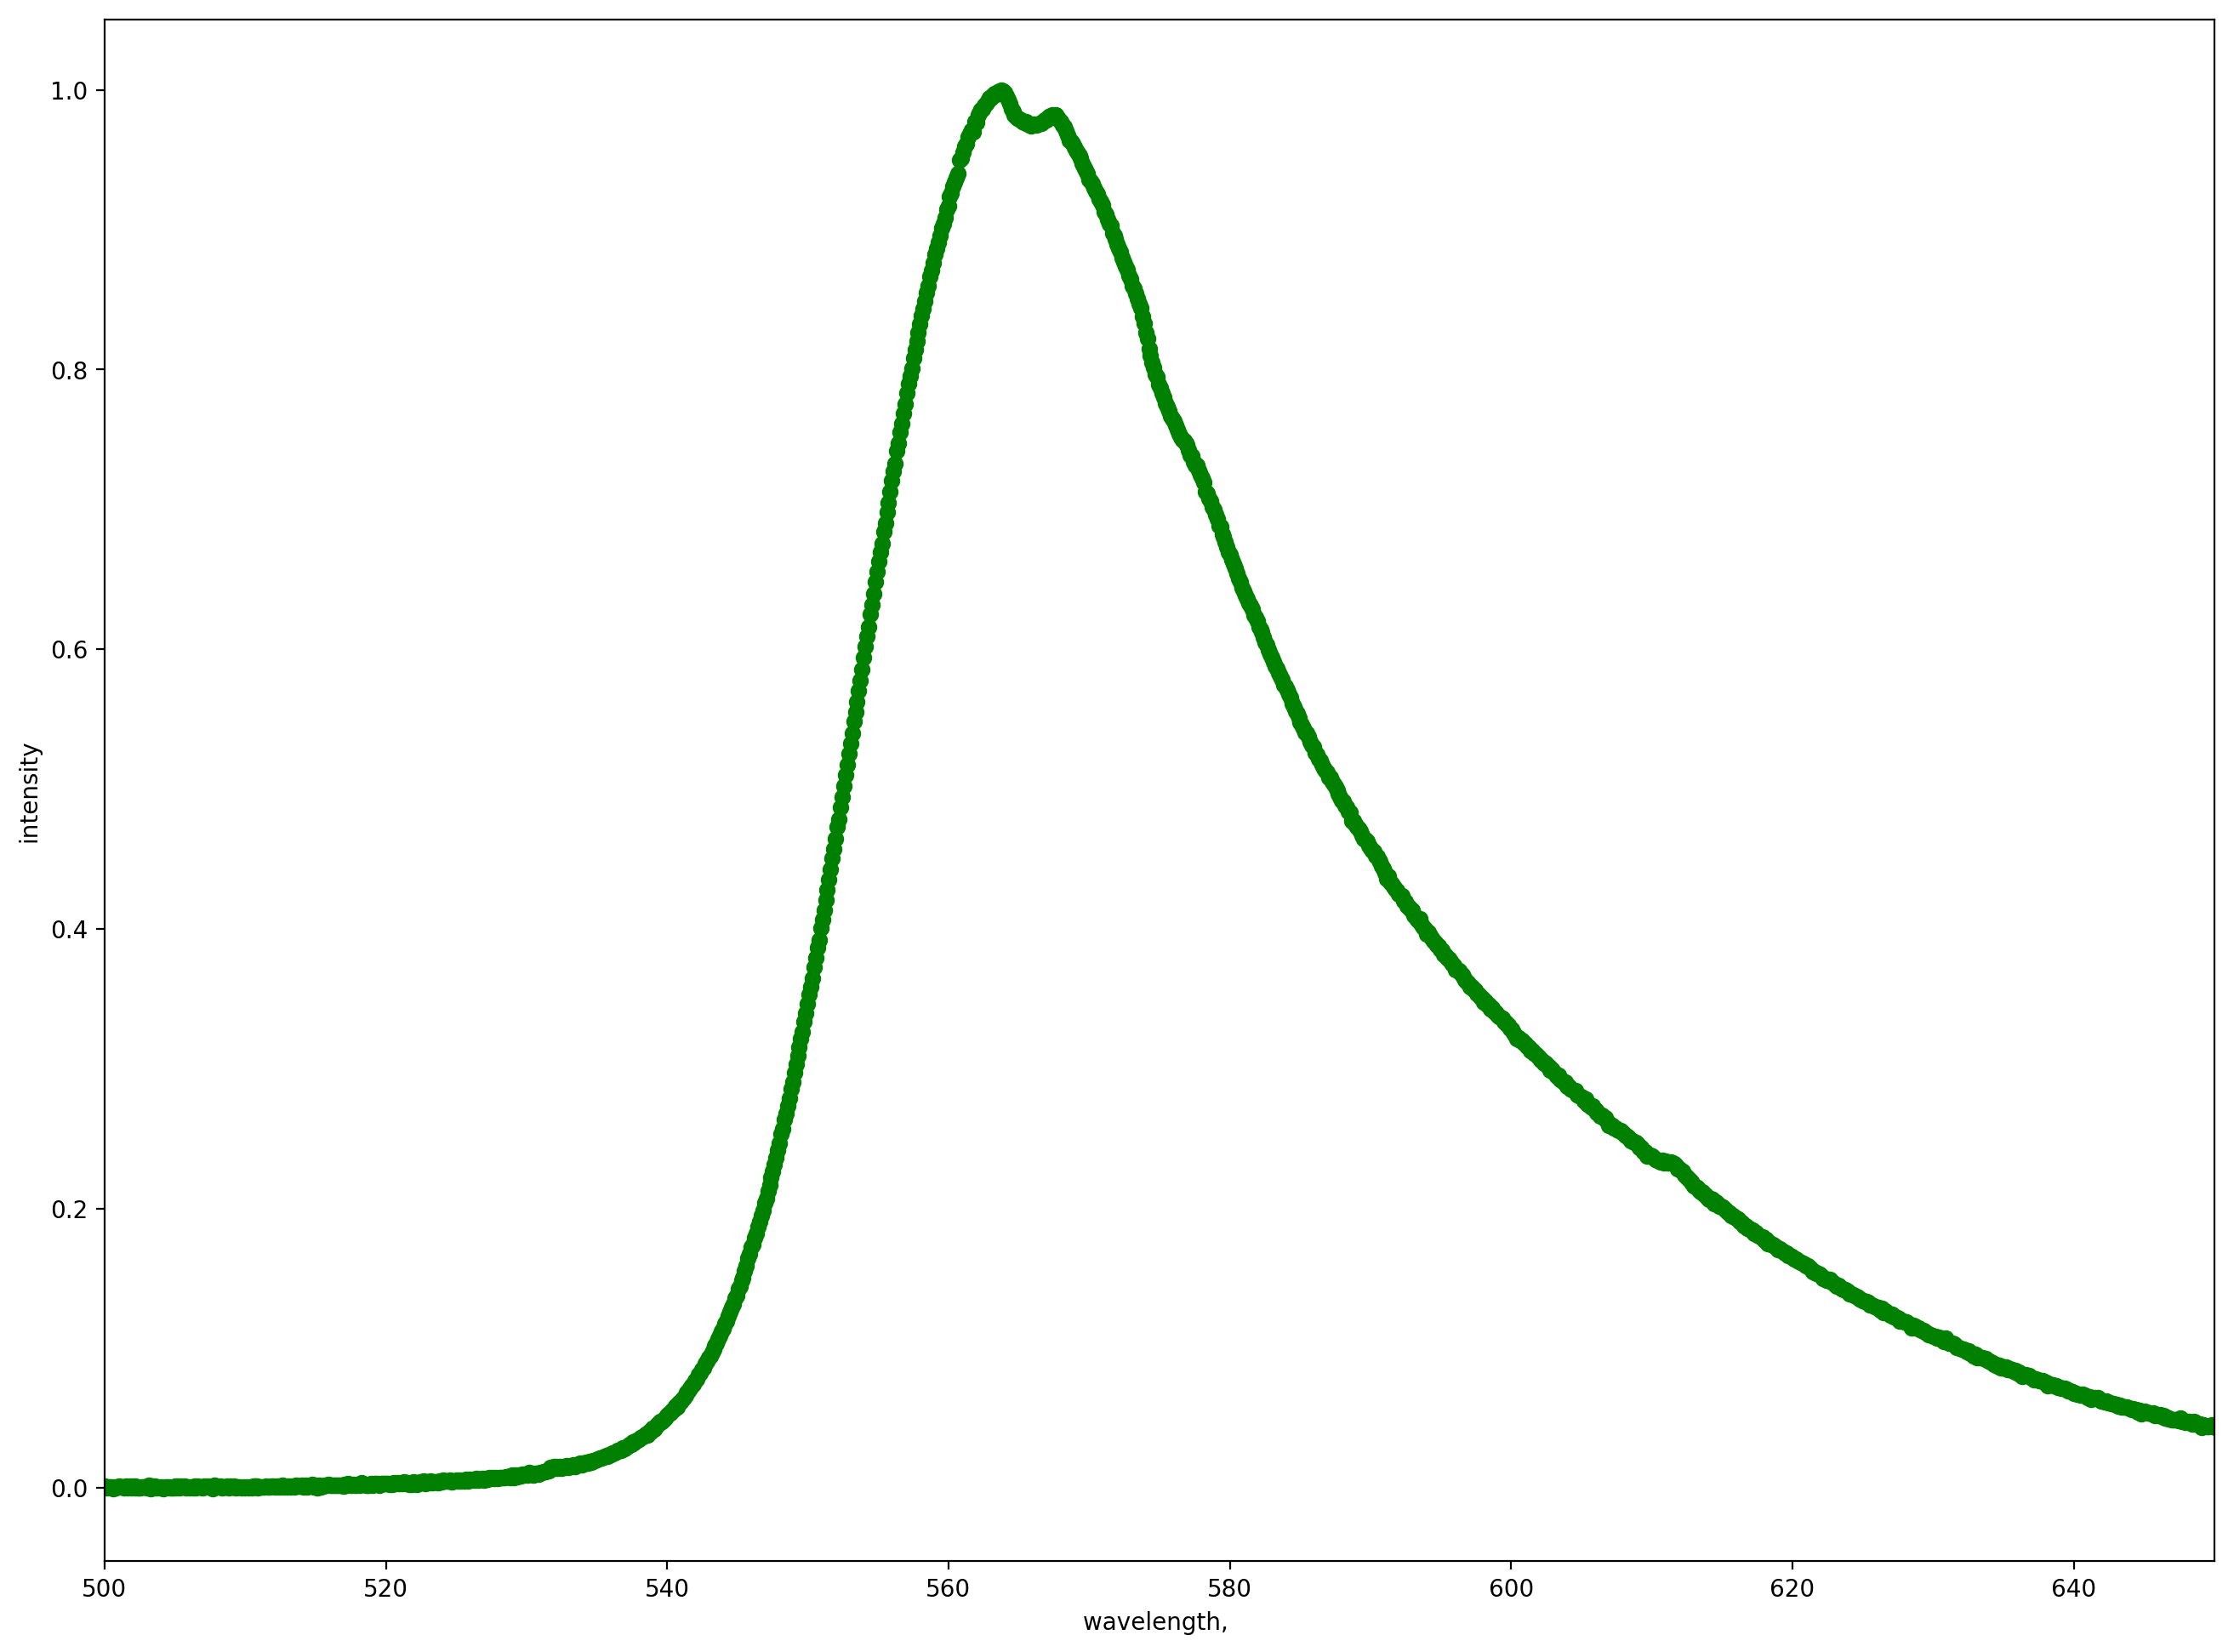

max fluorescence 563.7466431
max absorption 536.8331909


In [3]:
specdata1 = readSp('r6g/rd6_a_8.csv', ';')
specdata = readSp('r6g/rd6_ethGl_8.csv', delimiter = ';')
specdata2 = readSp('r6g/rd6_f_3.csv', ';')

rangeWl = np.copy(specdata2[:,0])
specAbs = np.copy(specdata[:,1] - specdata1[:,1])
specFlur = np.copy(specdata2[:,1])
#specdata = specdata * 0.1 / 0.12

#absorbtion
fig, ax = plt.subplots(num=None, figsize=(16, 12), dpi=200, facecolor='w', edgecolor='k')
#ax.plot(specdata[:,0], specdata[:,1], linestyle='', marker='o', color='green')
#ax.plot(specdata1[:,0], specdata1[:,1], linestyle='', marker='o', color='red')
#ax.plot(specdata1[:,0], specdata[:,1] - specdata1[:,1] , linestyle='', marker='o', color='blue')
ax.plot(specdata1[:,0], np.log(specdata[:,1]/specdata1[:,1]) / 2, linestyle='', marker='o', color='blue')

plt.xlabel('wavelength, ')
plt.ylabel('abs')
plt.ylim(0, 0.06)
plt.xlim(460, 600)
plt.show()

#fluor
fig, ax = plt.subplots(num=None, figsize=(16, 12), dpi=200, facecolor='w', edgecolor='k')

ax.plot(specdata2[:,0], specdata2[:,1]/max(specdata2[:,1]), linestyle='', marker='o', color='green')
#ax.plot(specdataE2[:-100,0], specdataE2[:-100,1]/max(specdataE2[:,1]), linestyle='', marker='o', color='red')

plt.xlabel('wavelength, ')
plt.ylabel('intensity')
plt.xlim(500, 650)
plt.show()

print('max fluorescence', specdata2[np.where(specdata2[:,1] == max(specdata2[:,1]))[0][0],0])
print('max absorption', specdata[np.where(specdata[:,1] - specdata1[:,1] == max(specdata[:,1] - specdata1[:,1]))[0][0],0])

In [21]:
#cutting all less 450
cutwl = np.where(rangeWl >= 450)[0][0]
specdata = np.copy(specdata[cutwl:])
specdata1 = np.copy(specdata1[cutwl:])
specdata2 = np.copy(specdata2[cutwl:])
specAbs = np.copy(specAbs[cutwl:])
rangeWl = np.copy(rangeWl[cutwl:])

(450, 620)

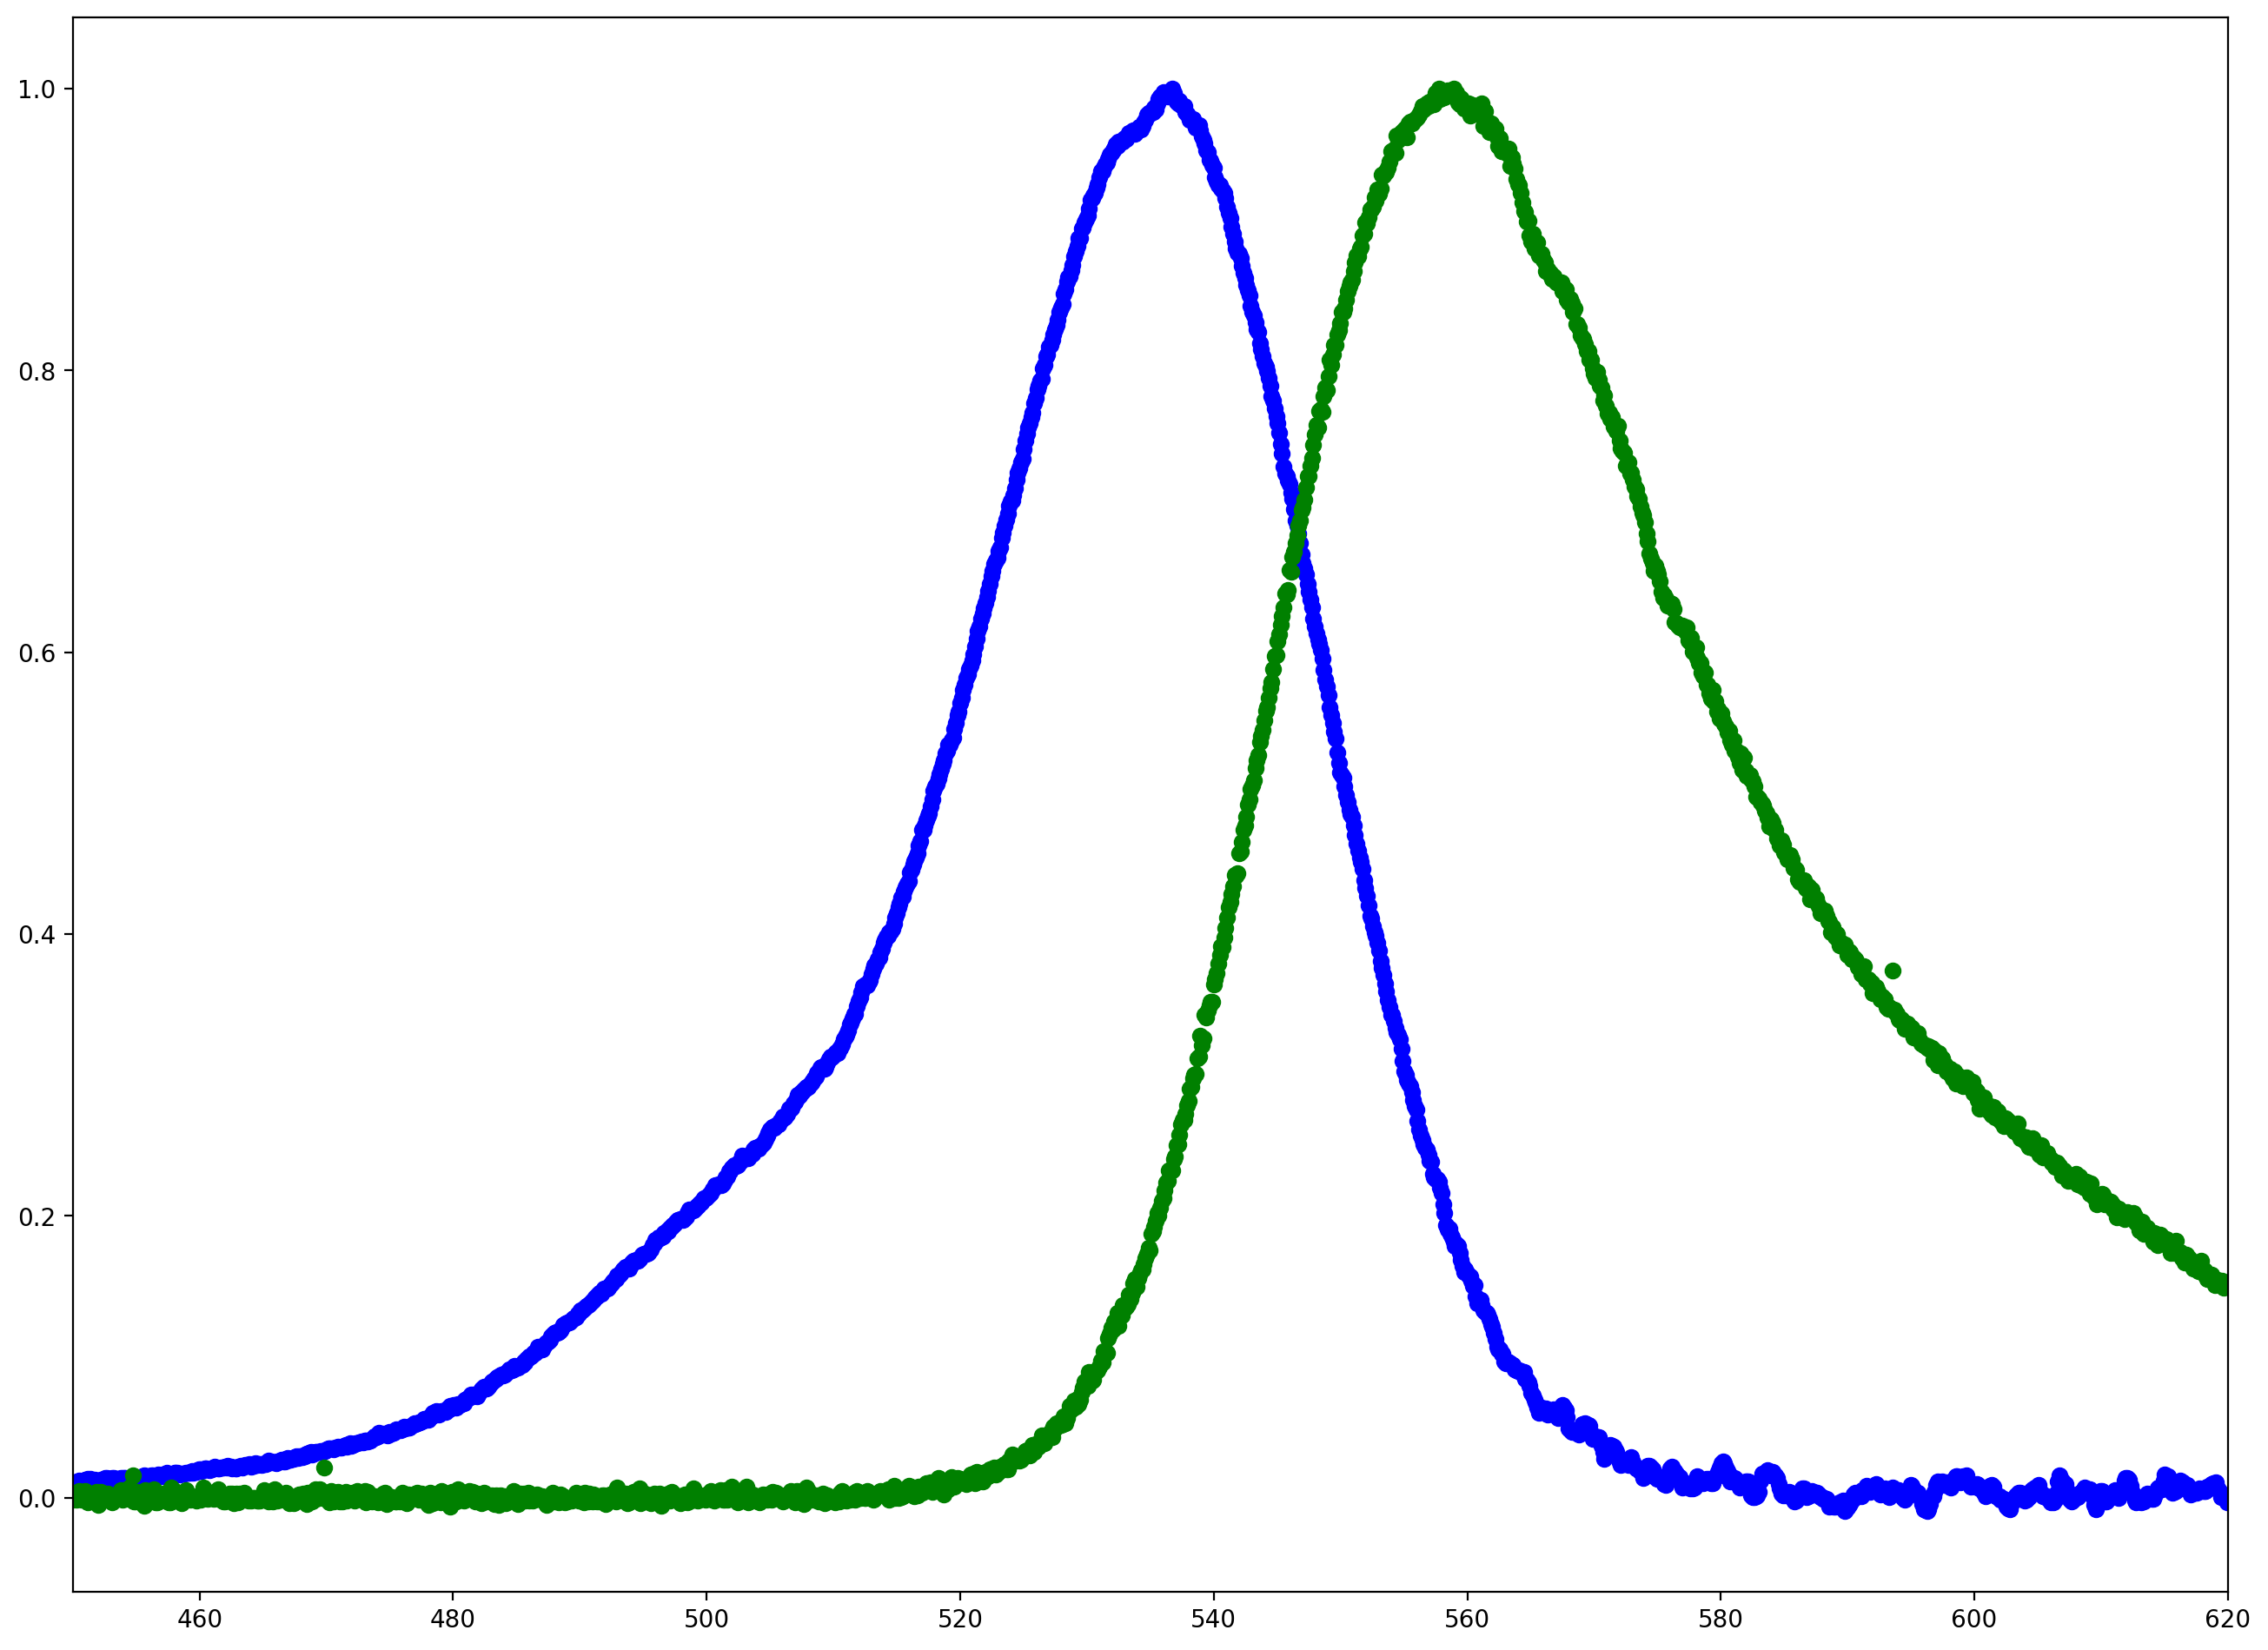

In [22]:
def est(x, a, b):
    return a + b * x
def est2(x, a, b):
    return np.exp(a) * np.exp(b * x)
def est1(x, a, b, c, d, e):
    return a + b * x + c * x ** 2 + d * x ** 3 + e* x**4

dwl = np.where(rangeWl >= 560)[0][0]
upwl = np.where(rangeWl <= 570)[0][-1]
popt, pcov= curve_fit(est, rangeWl[dwl: upwl], np.log(specAbs[dwl: upwl]))

specAbs2 = np.copy(specAbs) 
specAbs2[upwl:] = est2(rangeWl[upwl: ],*popt)

fig, ax = plt.subplots(num=None, figsize=(16, 12), dpi=200, facecolor='w', edgecolor='k')
ax.plot(specdata1[:,0], (specdata[:,1] - specdata1[:,1]) / max(specdata[:,1] - specdata1[:,1]), linestyle='', marker='o', color='blue')
ax.plot(specdata1[:,0], specdata2[:,1] / max(specdata2[:,1]), linestyle='', marker='o', color='green')
#ax.plot(rangeWl[dwl: ], est2(rangeWl[dwl: ],*popt) / max(specdata[:,1] - specdata1[:,1]), linestyle='', marker='o', color='red')
#ax.plot(rangeWl[: ], specAbs2 / max(specdata[:,1] - specdata1[:,1]), linestyle='', marker='o', color='purple')
#plt.ylim(0,0.3)
plt.xlim(450, 620)

Text(0, 0.5, 'absorption coefficient')

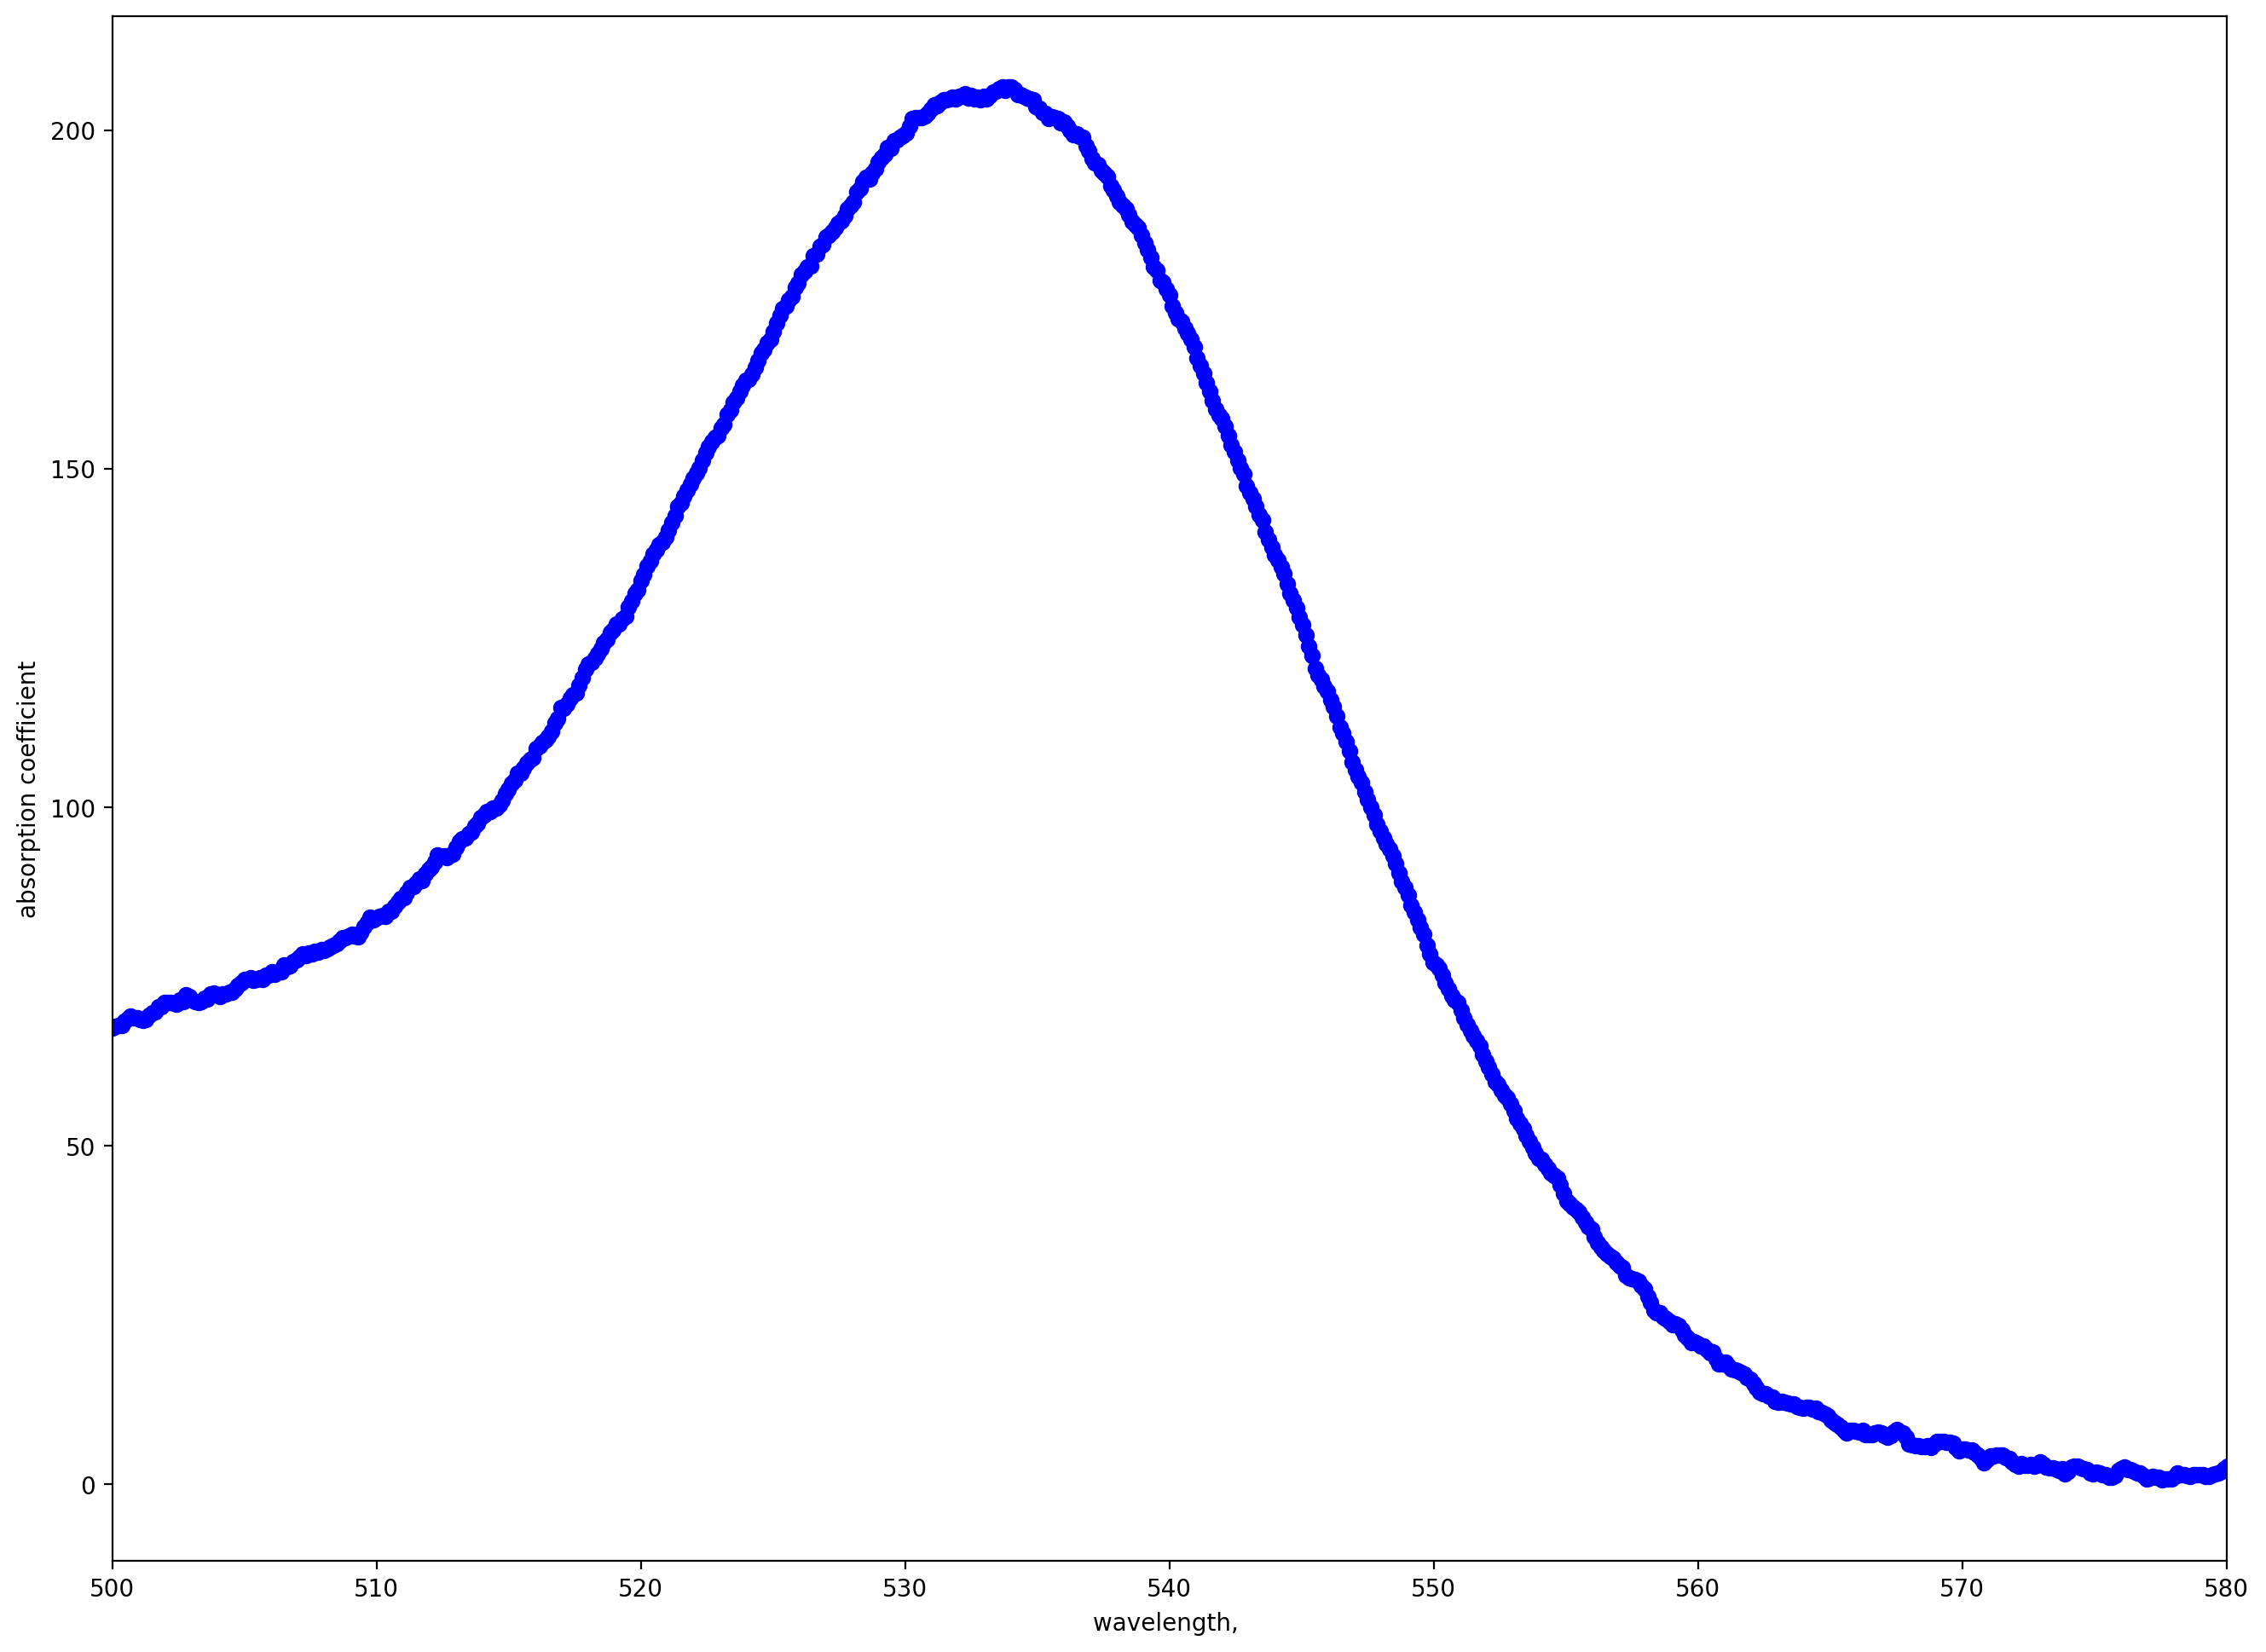

In [23]:
alpha = np.log(specdata[:,1]/specdata1[:,1])

def est(x, a, b):
    return a + b * x
def est2(x, a, b):
    return np.exp(a) * np.exp(b * x)

dwl = np.where(rangeWl >= 550)[0][0]
upwl = np.where(rangeWl <= 560)[0][-1]
popt, pcov= curve_fit(est, rangeWl[dwl: upwl], np.log(alpha[dwl: upwl]))

alpha2 = np.copy(alpha) 
alpha2[upwl:] = est2(rangeWl[upwl: ],*popt)

fig, ax = plt.subplots(num=None, figsize=(16, 12), dpi=200, facecolor='w', edgecolor='k')
ax.plot(specdata2[:,0], alpha/(2 * 1e-3), linestyle='', marker='o', color='blue')
#ax.plot(specdataE1[:-100,0], specdataE1[:-100,1], linestyle='', marker='o', color='red')


#ax.plot(specdata2[:,0], alpha2/ max(alpha2), linestyle='', marker='o', color='green')
plt.xlim(500, 580)
#plt.ylim(0)
plt.xlabel('wavelength, ')
plt.ylabel('absorption coefficient')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


estimated temp 411.1687040496618


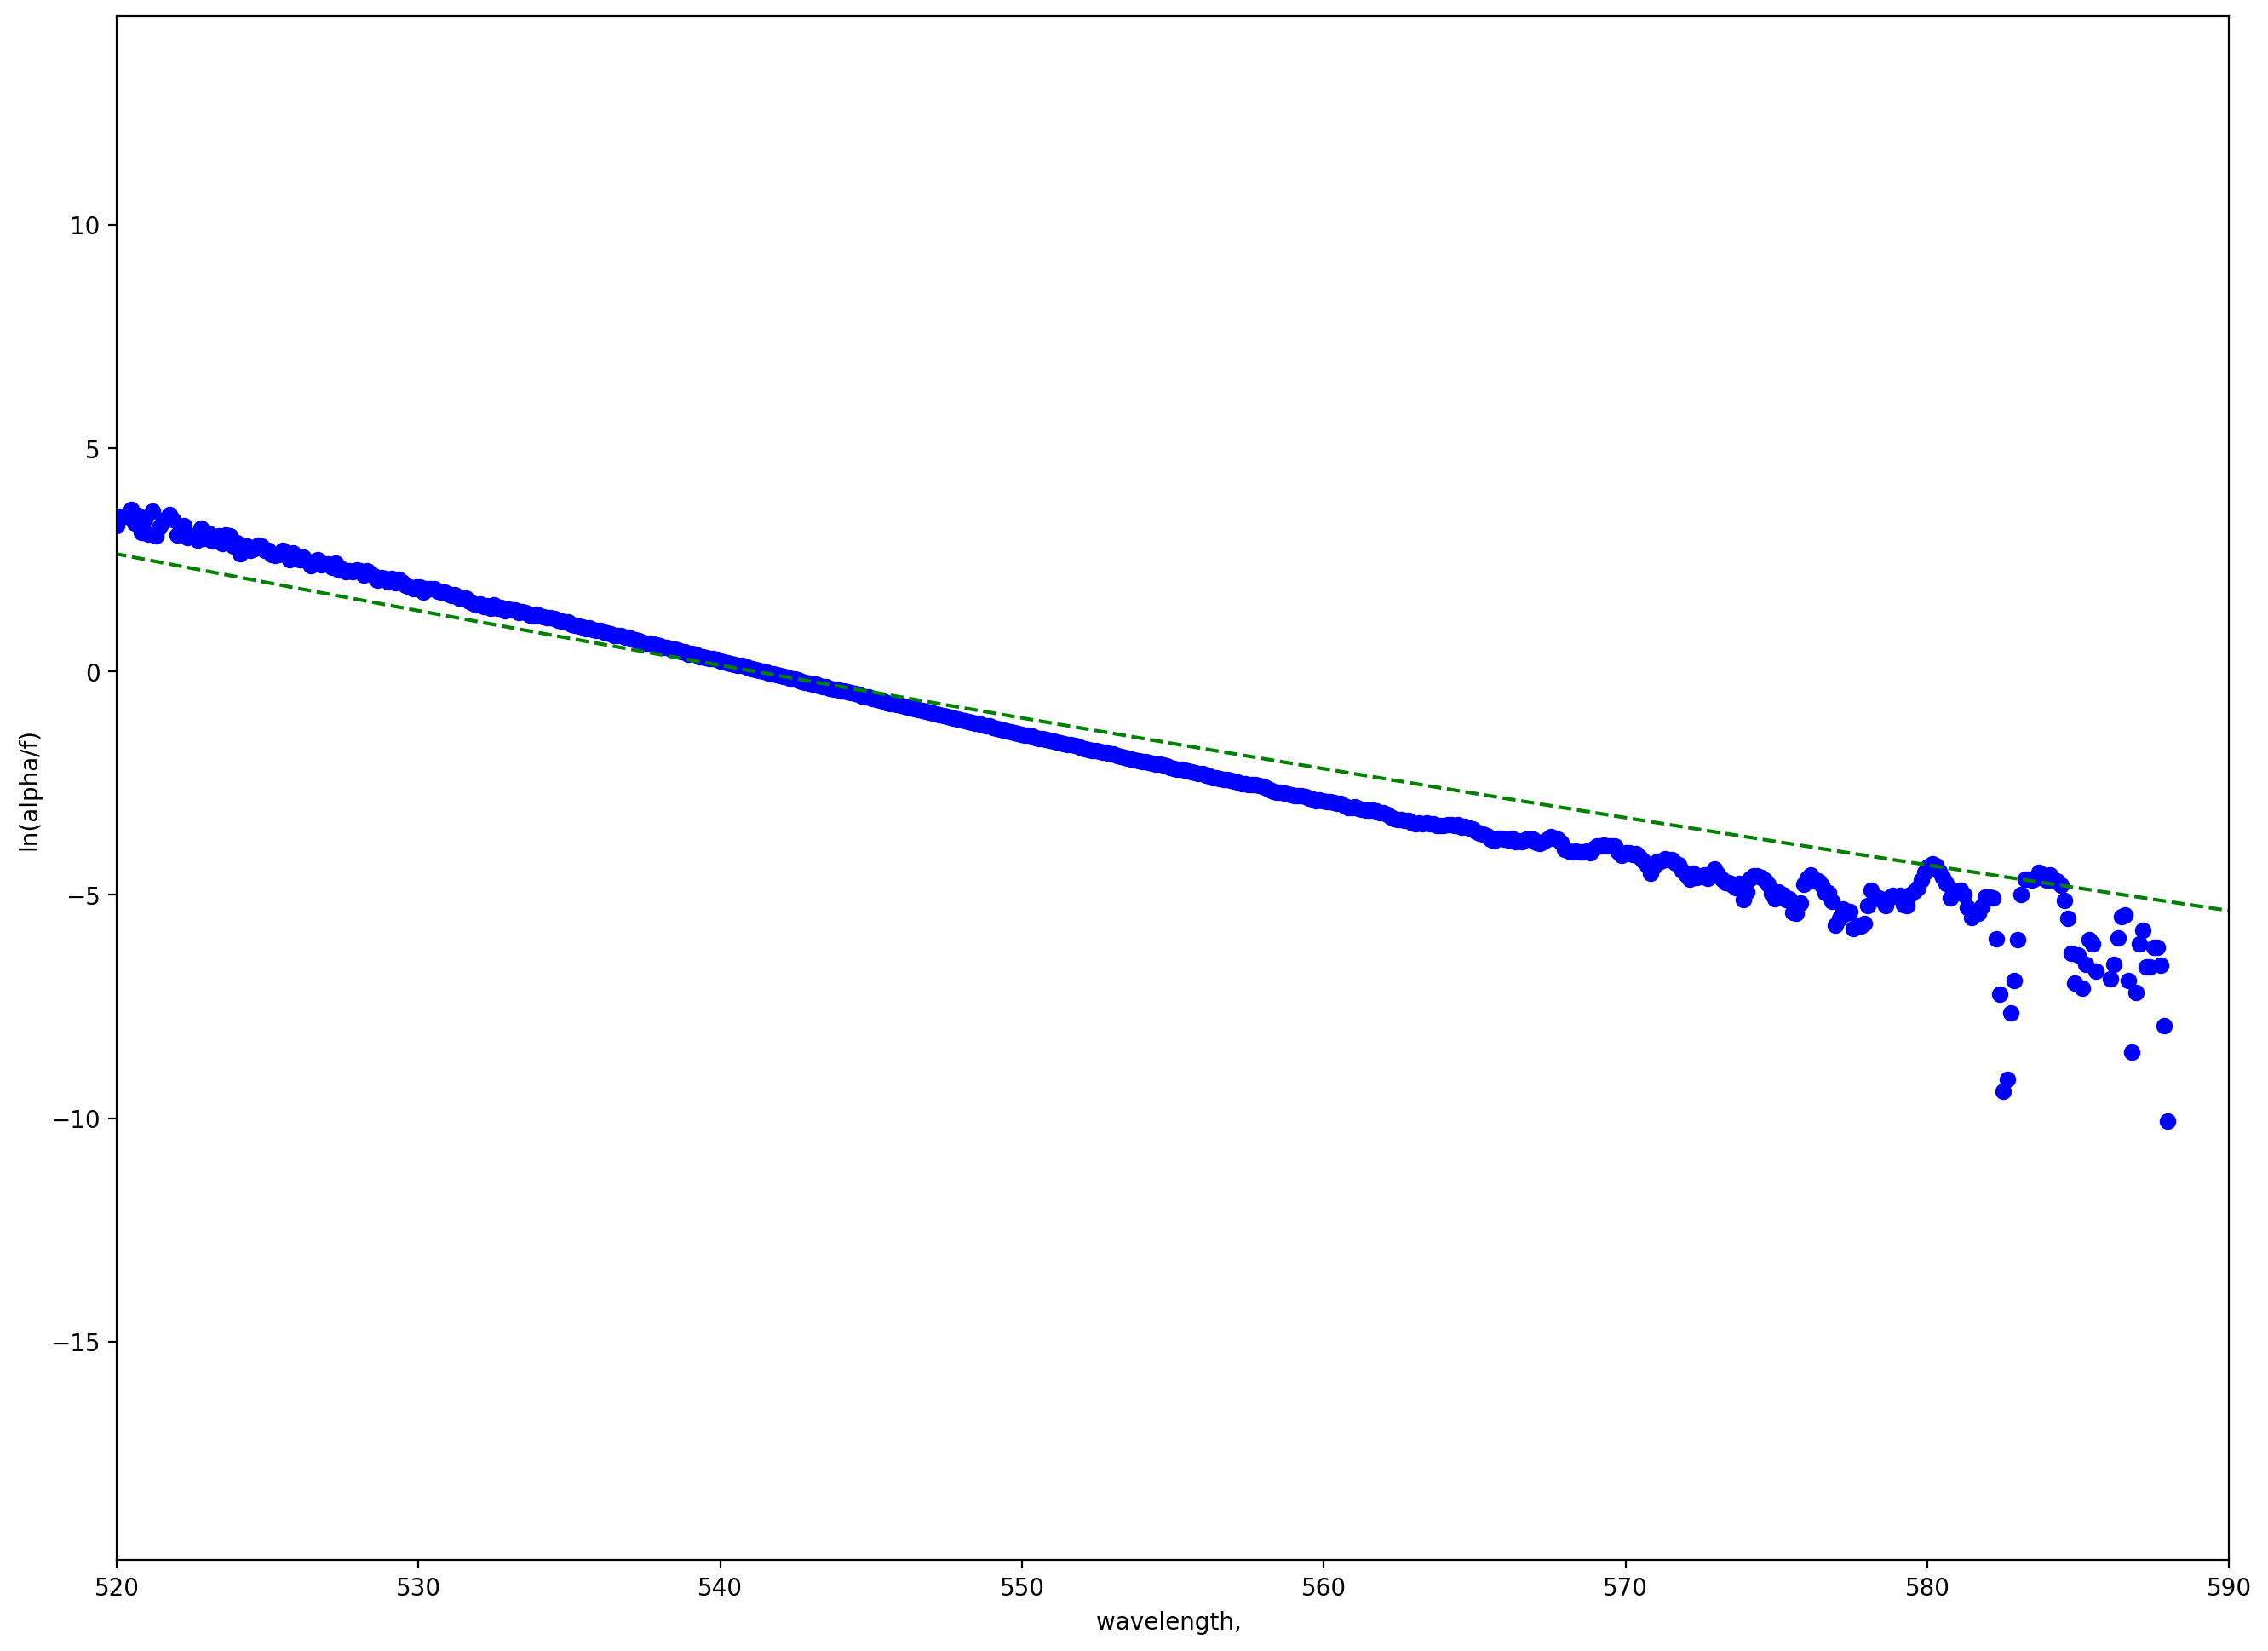

In [24]:
lolo = (np.log(alpha/specdata2[:,1]))

fig, ax = plt.subplots(num=None, figsize=(16, 12), dpi=200, facecolor='w', edgecolor='k')
#freq = 2 * np.pi * c / specdata1[:,0] * 1e+9
ax.plot(specdata2[:,0], lolo, linestyle='', marker='o', color='blue')
#ax.plot(specdata2[:,0], popt[0]*(2 * np.pi * c * 1e+9 / specdata2[:,0]) + popt[1], linestyle='', marker='o', color='green')
#ax.plot(alpha, specdata2[:,1], linestyle='', marker='o', color='blue')
plt.xlabel('wavelength, ')
plt.ylabel('ln(alpha/f)')
plt.xlim(520, 590)
#plt.xlim(3.4 * 1e+15, 3.5 * 1e+15)

#alpha = specdata[:,1] - specdata1[:,1]
#lolo = np.log(alpha2/specdata2[:,1])

dwV = 2 * np.pi * c / 520 * 1e+9
upwV = 2 * np.pi * c /  600 * 1e+9
freq = 2 * np.pi * c / specdata2[:,0] * 1e+9
upw = np.where(freq >= upwV)[0][-1] 
dw = np.where(freq <= dwV)[0][0] 
def func(x, a, b):
    return x * a + b
lolo = np.nan_to_num(lolo)
popt, pcov = curve_fit(func,   freq[dw:upw], (lolo[dw:upw]))

ax.plot(specdata2[:,0], func(freq[:], *popt), linestyle='--', marker='', color='green')

#spec temperature  
print('estimated temp', hb  /(k * popt[0]))

avg temp: 299.7682920059864
std temp 111.07420046248467
total number of points 679


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater


(0, 1000)

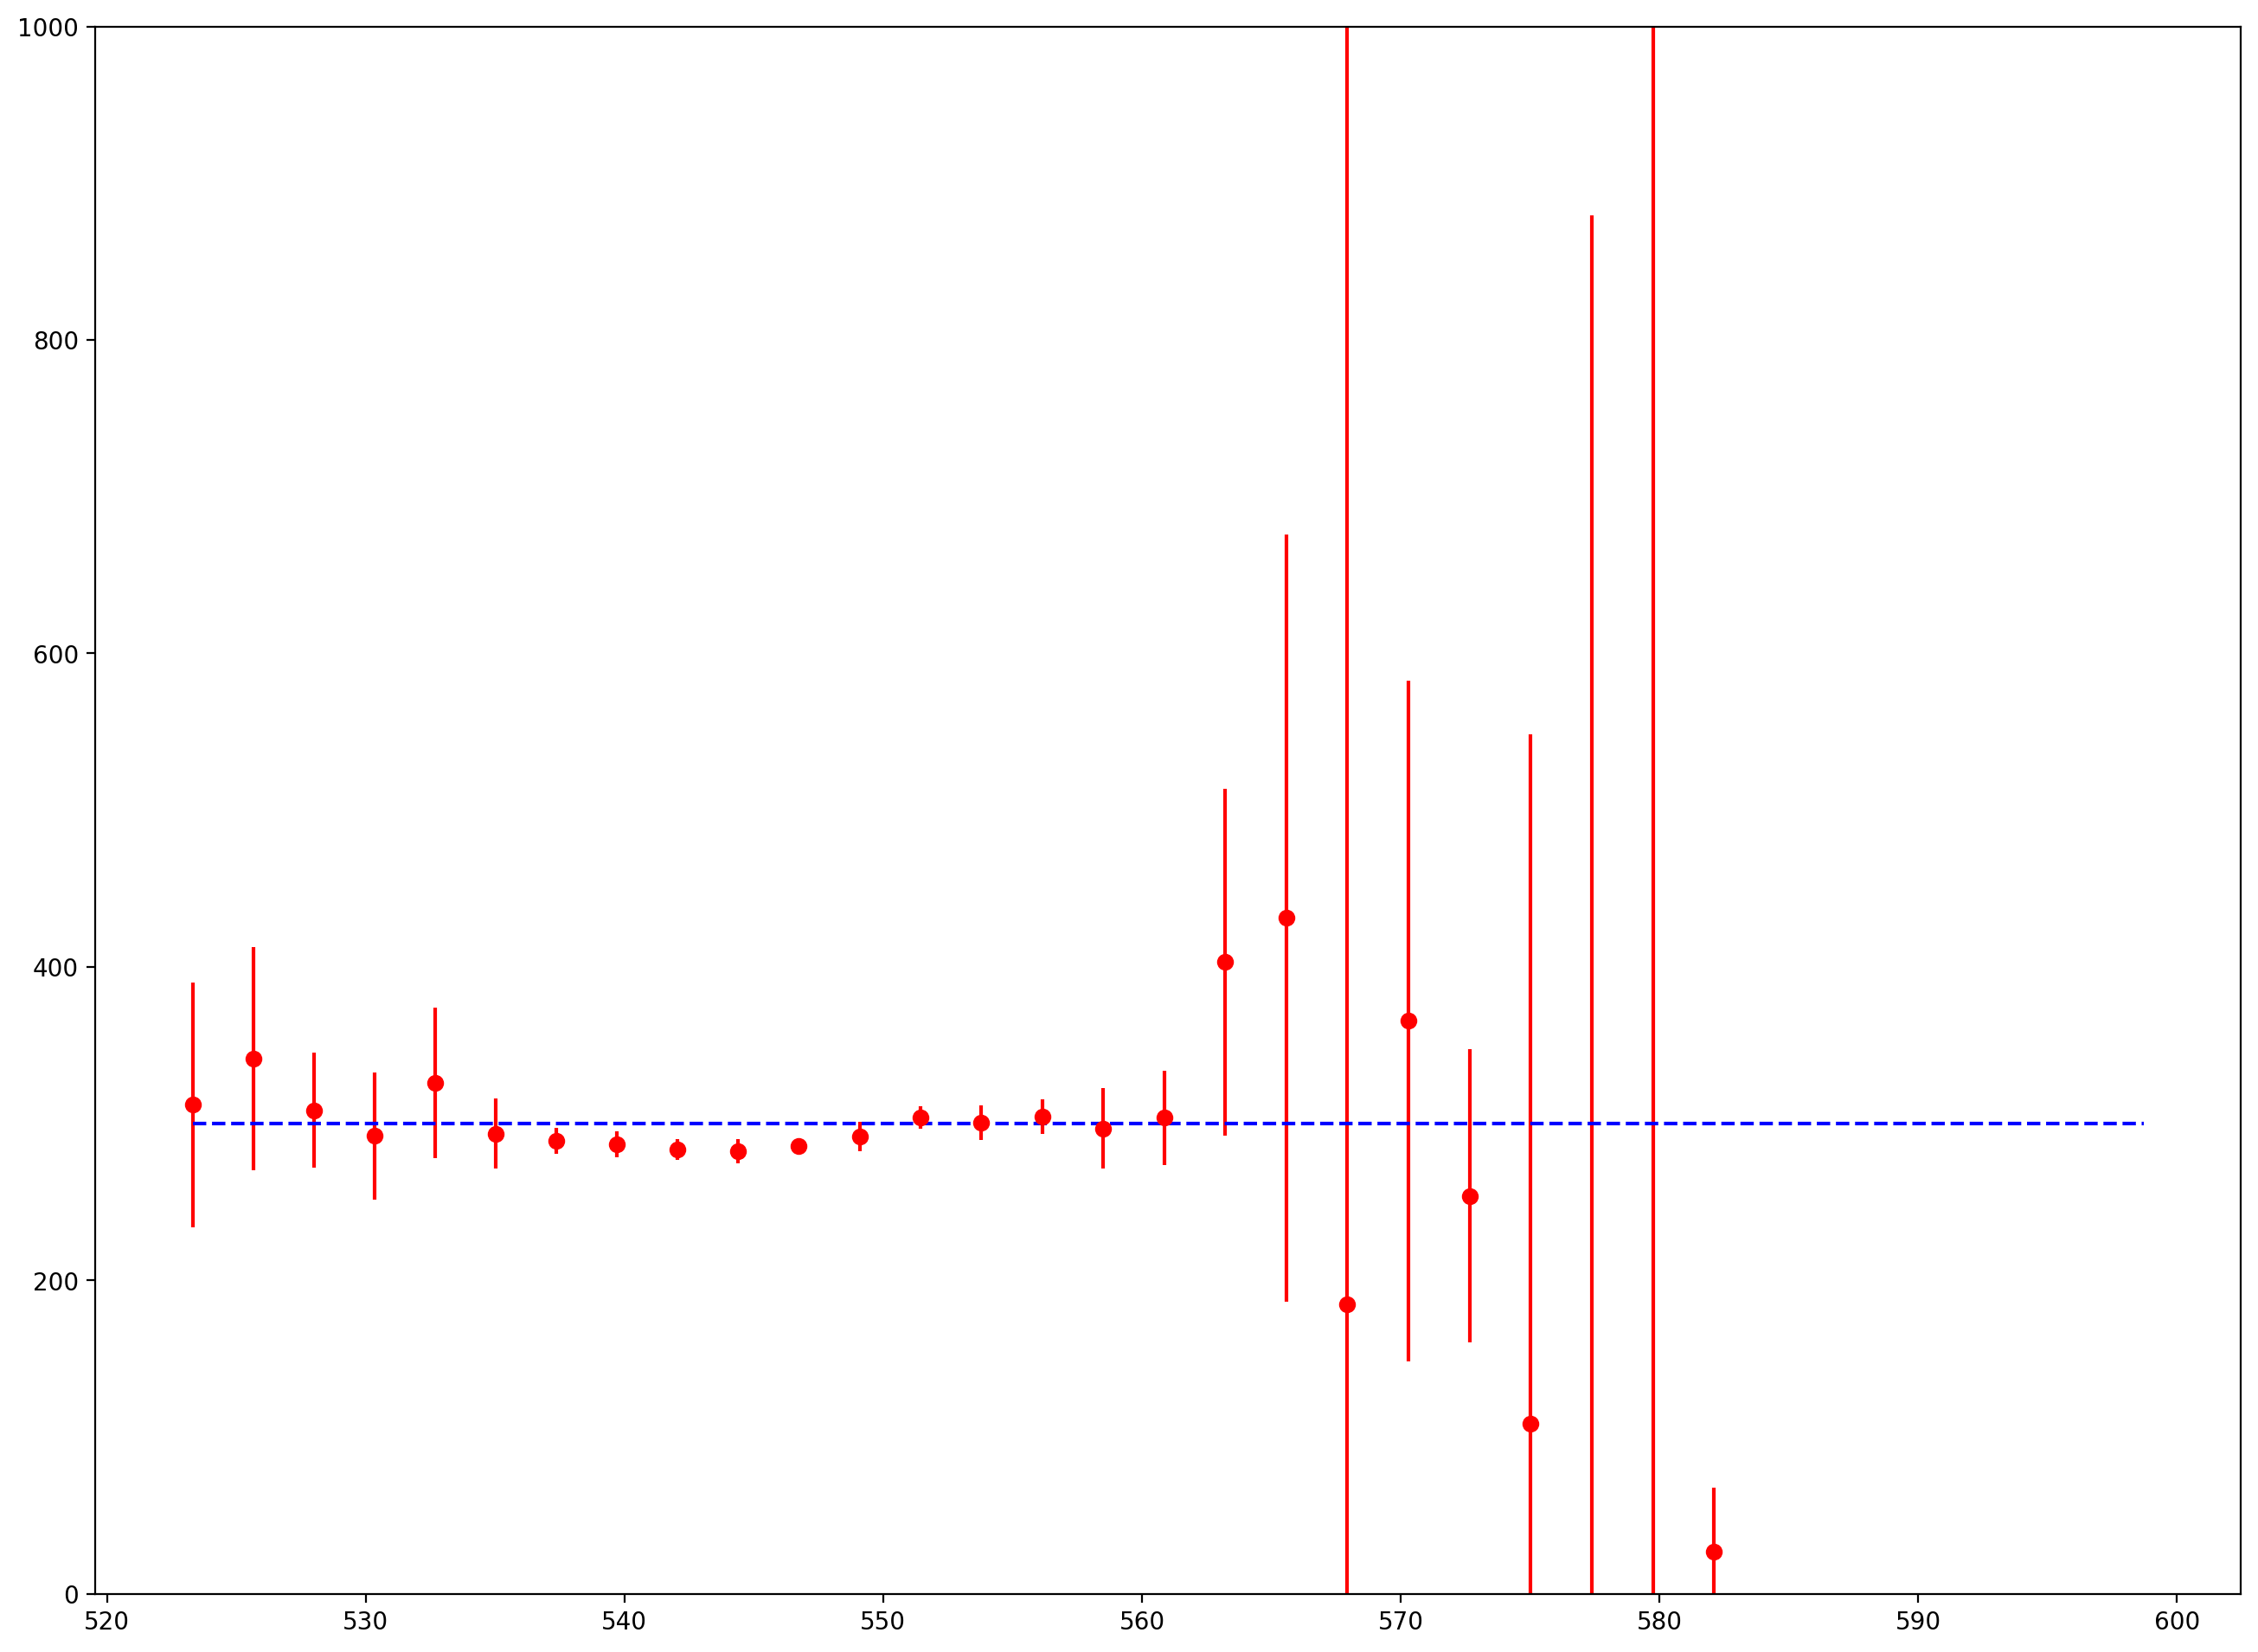

In [25]:
def deriv(y, x, dBorder, upBorder, avg = 5):
    derivv = np.zeros(y.shape)
    for i in range(dBorder, upBorder):
        #print(i, dBorder, upBorder)
        for j in range(1, avg + 1):
            derivv[i] += (y[i+j] - y[i-j])/(x[i+j] - x[i-j])
        derivv[i] = derivv[i] / avg
    return derivv
        
temp2 = deriv(np.log(alpha * freq** 3 / specdata2[:, 1]), freq, dw, upw, 15)
temp2 = (hb / k) / temp2
temp2 = temp2[dw:upw]
#def deriv1(y, x, j):
#    (y[i+j] - y[i-j])/(x[i+j] - x[i-j])
    
temp = np.array([])
for ii in range(dw,upw):
    #print(ii)
    temp = np.append(temp, (hb / k) / ((np.log(alpha[ii+5] * freq[ii+5] ** 3 / specdata2[ii+5, 1]) - 
                           np.log(alpha[ii-5] * freq[ii-5] ** 3 / specdata2[ii-5, 1]))/ 
                            (freq[ii + 5] - freq[ii-5])))
    

temp11 = temp2[temp2 > 0]
temp11 = temp11[temp11 < 1000]
print('avg temp:', np.average( temp11))
print('std temp',np.std(temp11))

print('total number of points', specdata2[dw:upw, 0].size)
def avgPlot(xIn, yIn, num):
    while yIn.size%num != 0:
        yIn = yIn[1:]
        xIn = xIn[1:]
    yOut = np.mean(yIn.reshape(-1, num), axis=1)
    xOut = np.mean(xIn.reshape(-1, num), axis=1)
    error = np.std(yIn.reshape(-1, num), axis=1)
    return xOut, yOut, error

wl1, temp1, err1 = avgPlot(specdata2[dw:upw, 0], temp, 5)
wl1, temp22, err2 = avgPlot(specdata2[dw:upw, 0], temp2, 20)


fig, ax = plt.subplots(num=None, figsize=(16, 12), dpi=200, facecolor='w', edgecolor='k')
#ax.plot(specdata2[dw:upw, 0], temp2[dw:upw], linestyle='', marker='o', color='red')#plt.ylim(0, 600)
ax.errorbar(wl1, temp22, yerr=err2, fmt='-o', linestyle='', color='red')
#ax.errorbar(wl1, temp1, yerr=err1, fmt='-o', linestyle='', color='green')
ax.plot(wl1, np.ones(wl1.size) * np.average(temp11), linestyle='--', marker='', color='blue')#plt.ylim(0, 600)
#print(np.average(temp22))
plt.ylim(0,1000)
#plt.xlim(500, 560)

In [5]:
specFlur 

rangeWl

#ex = readSp('lolo.csv', ';')
#n = 1 / (1.010 * 1e-3)
#np.trapz(specFlur[:,1] * n * 0.1, ex[:,0] * 1e-9)
    
absCoeff = np.log(805/288) / 0.01
absCoeff2 = np.log(805/140) / 0.01
absCoeff

102.78817972826175

In [11]:
# rhodamine 6 from internet
specdataE1 = np.genfromtxt('r6g/rd6_a_example.csv', delimiter = ';')
specdataE2 = np.genfromtxt('r6g/rd6_f_example.csv', delimiter = ';')
#specAbsEx = np.genfromtxt('r6g/rhodamine6G.abs_modified.dat', delimiter = ' ')

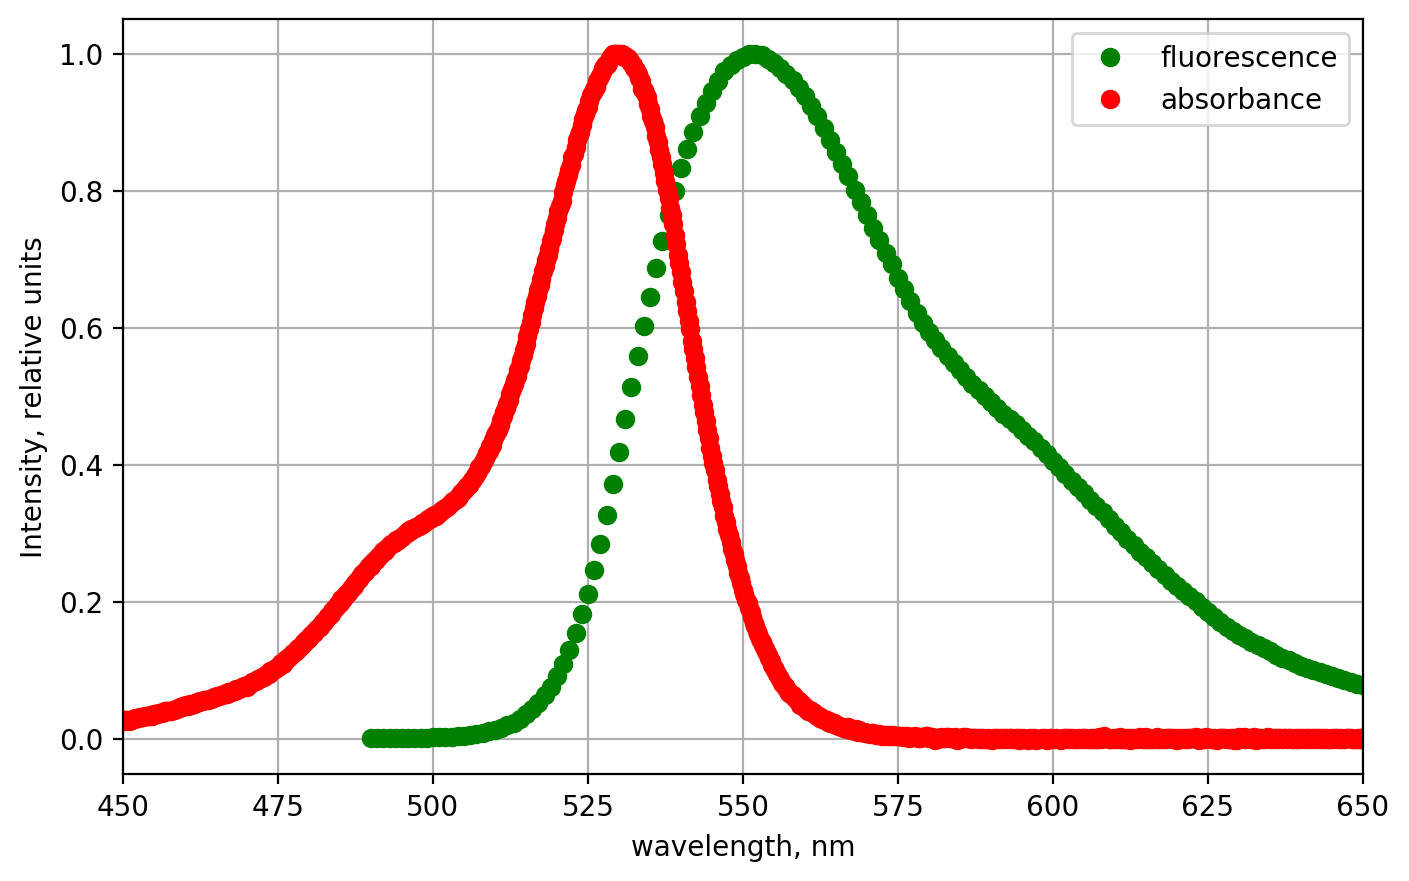

In [27]:
#absorbtion
fig, ax = plt.subplots(num=None, figsize=(8, 5), dpi=200, facecolor='w', edgecolor='k')

ax.plot(specdataE2[:-100,0], specdataE2[:-100,1]/max(specdataE2[:,1]), linestyle='', marker='o', color='green')
#ax.plot(specAbsEx[:,0], specAbsEx[:,1]/max(specAbsEx[:,1]), linestyle='', marker='o', color='blue')

#ax.plot(x[:,0], x[:,1]/max(x[:,1]), linestyle='', marker='o', color='blue')
ax.plot(specdataE1[:-100,0], specdataE1[:-100,1]/max(specdataE1[:-100,1]), linestyle='', marker='o', color='red')

plt.xlabel('wavelength, nm')
plt.ylabel('Intensity, relative units')
plt.legend(('fluorescence','absorbance'))
#plt.ylim(0,0.03)
plt.xlim(450, 650)
plt.grid(True)
plt.show()

In [12]:
print('fluor',specdataE2[np.where(specdataE2[:,1] == max(specdataE2[:,1]))[0][0],0])
print('absorb', x[np.where(x[:,1] == max(x[:,1]))[0][0],0])


fluor 552.0
absorb 529.99998


In [19]:
#alpha1 = np.log(specdataE1)
x = np.array([[1,1]])
for _ in specdataE2:
    x = np.append(x, 
                  [specdataE1[np.where(abs(specdataE1[:,0] - _[0]) == min(abs(specdataE1[:,0] - _[0])))[0][0]
                             , :]], axis = 0)
    #print(_[0])
    #print(np.where(abs(specdataE1[:,0] - _[0]) == min(abs(specdataE1[:,0] - _[0])))[0][0])
x = x[1:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


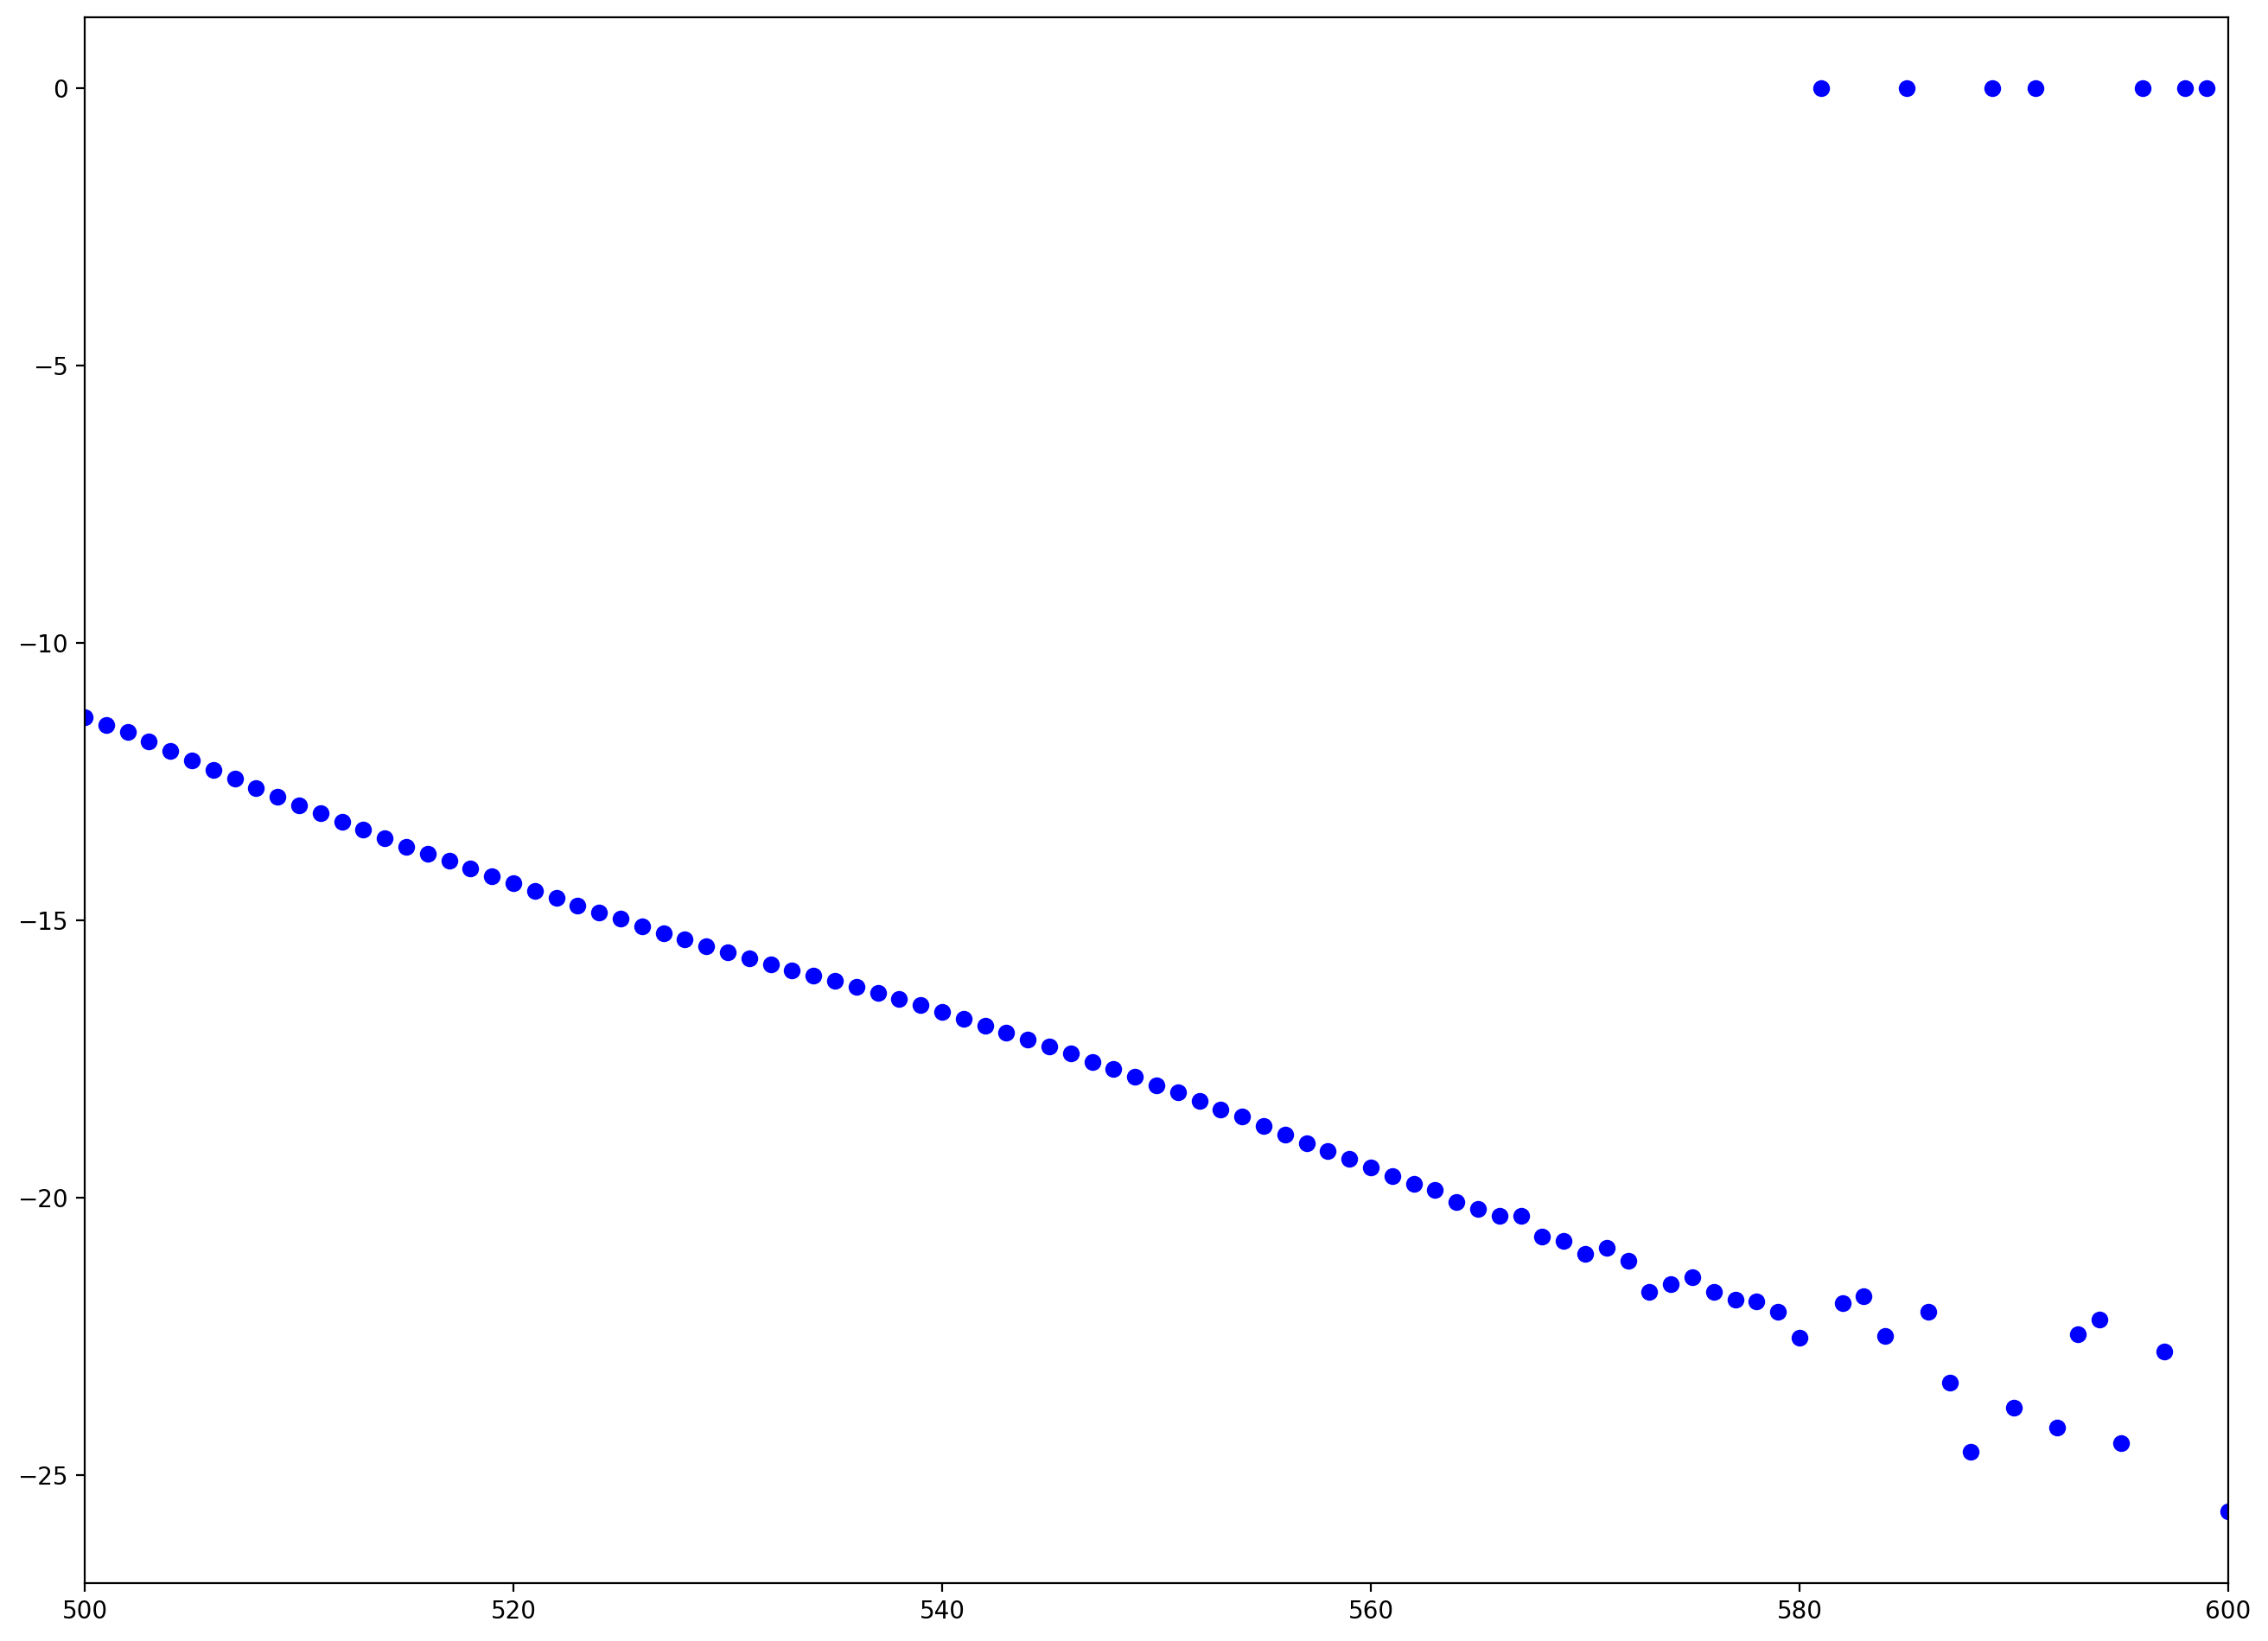

estimated spec temp 948.0604267661909


In [20]:
lolo = np.nan_to_num(np.log(x[:,1]/specdataE2[:,1]))

fig, ax = plt.subplots(num=None, figsize=(16, 12), dpi=200, facecolor='w', edgecolor='k')
#freq = 2 * np.pi * c / specdataE2[:,0] * 1e+9
ax.plot(specdataE2[:,0], lolo, linestyle='', marker='o', color='blue')
#ax.plot(alpha, specdata2[:,1], linestyle='', marker='o', color='blue')
plt.xlim(500, 600)
#plt.xlim(3.4 * 1e+15, 3.5 * 1e+15)
#plt.ylim(-10, -5 )
plt.show()

dwV = 2 * np.pi * c / 500 * 1e+9
upwV = 2 * np.pi * c / 600 * 1e+9
freq = 2 * np.pi * c / specdataE2[:,0] * 1e+9
upw = np.where(freq >= upwV)[0][-1] 
dw = np.where(freq <= dwV)[0][0] 
def func(x, a, b):
    return x * a + b
popt, pcov = curve_fit(func, freq[dw:upw], np.nan_to_num(lolo[dw:upw]))

#spec temp
print('estimated spec temp', hb  /(k * popt[0]))

avg temp 284.7186181213914
total number of points 100


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


(500, 560)

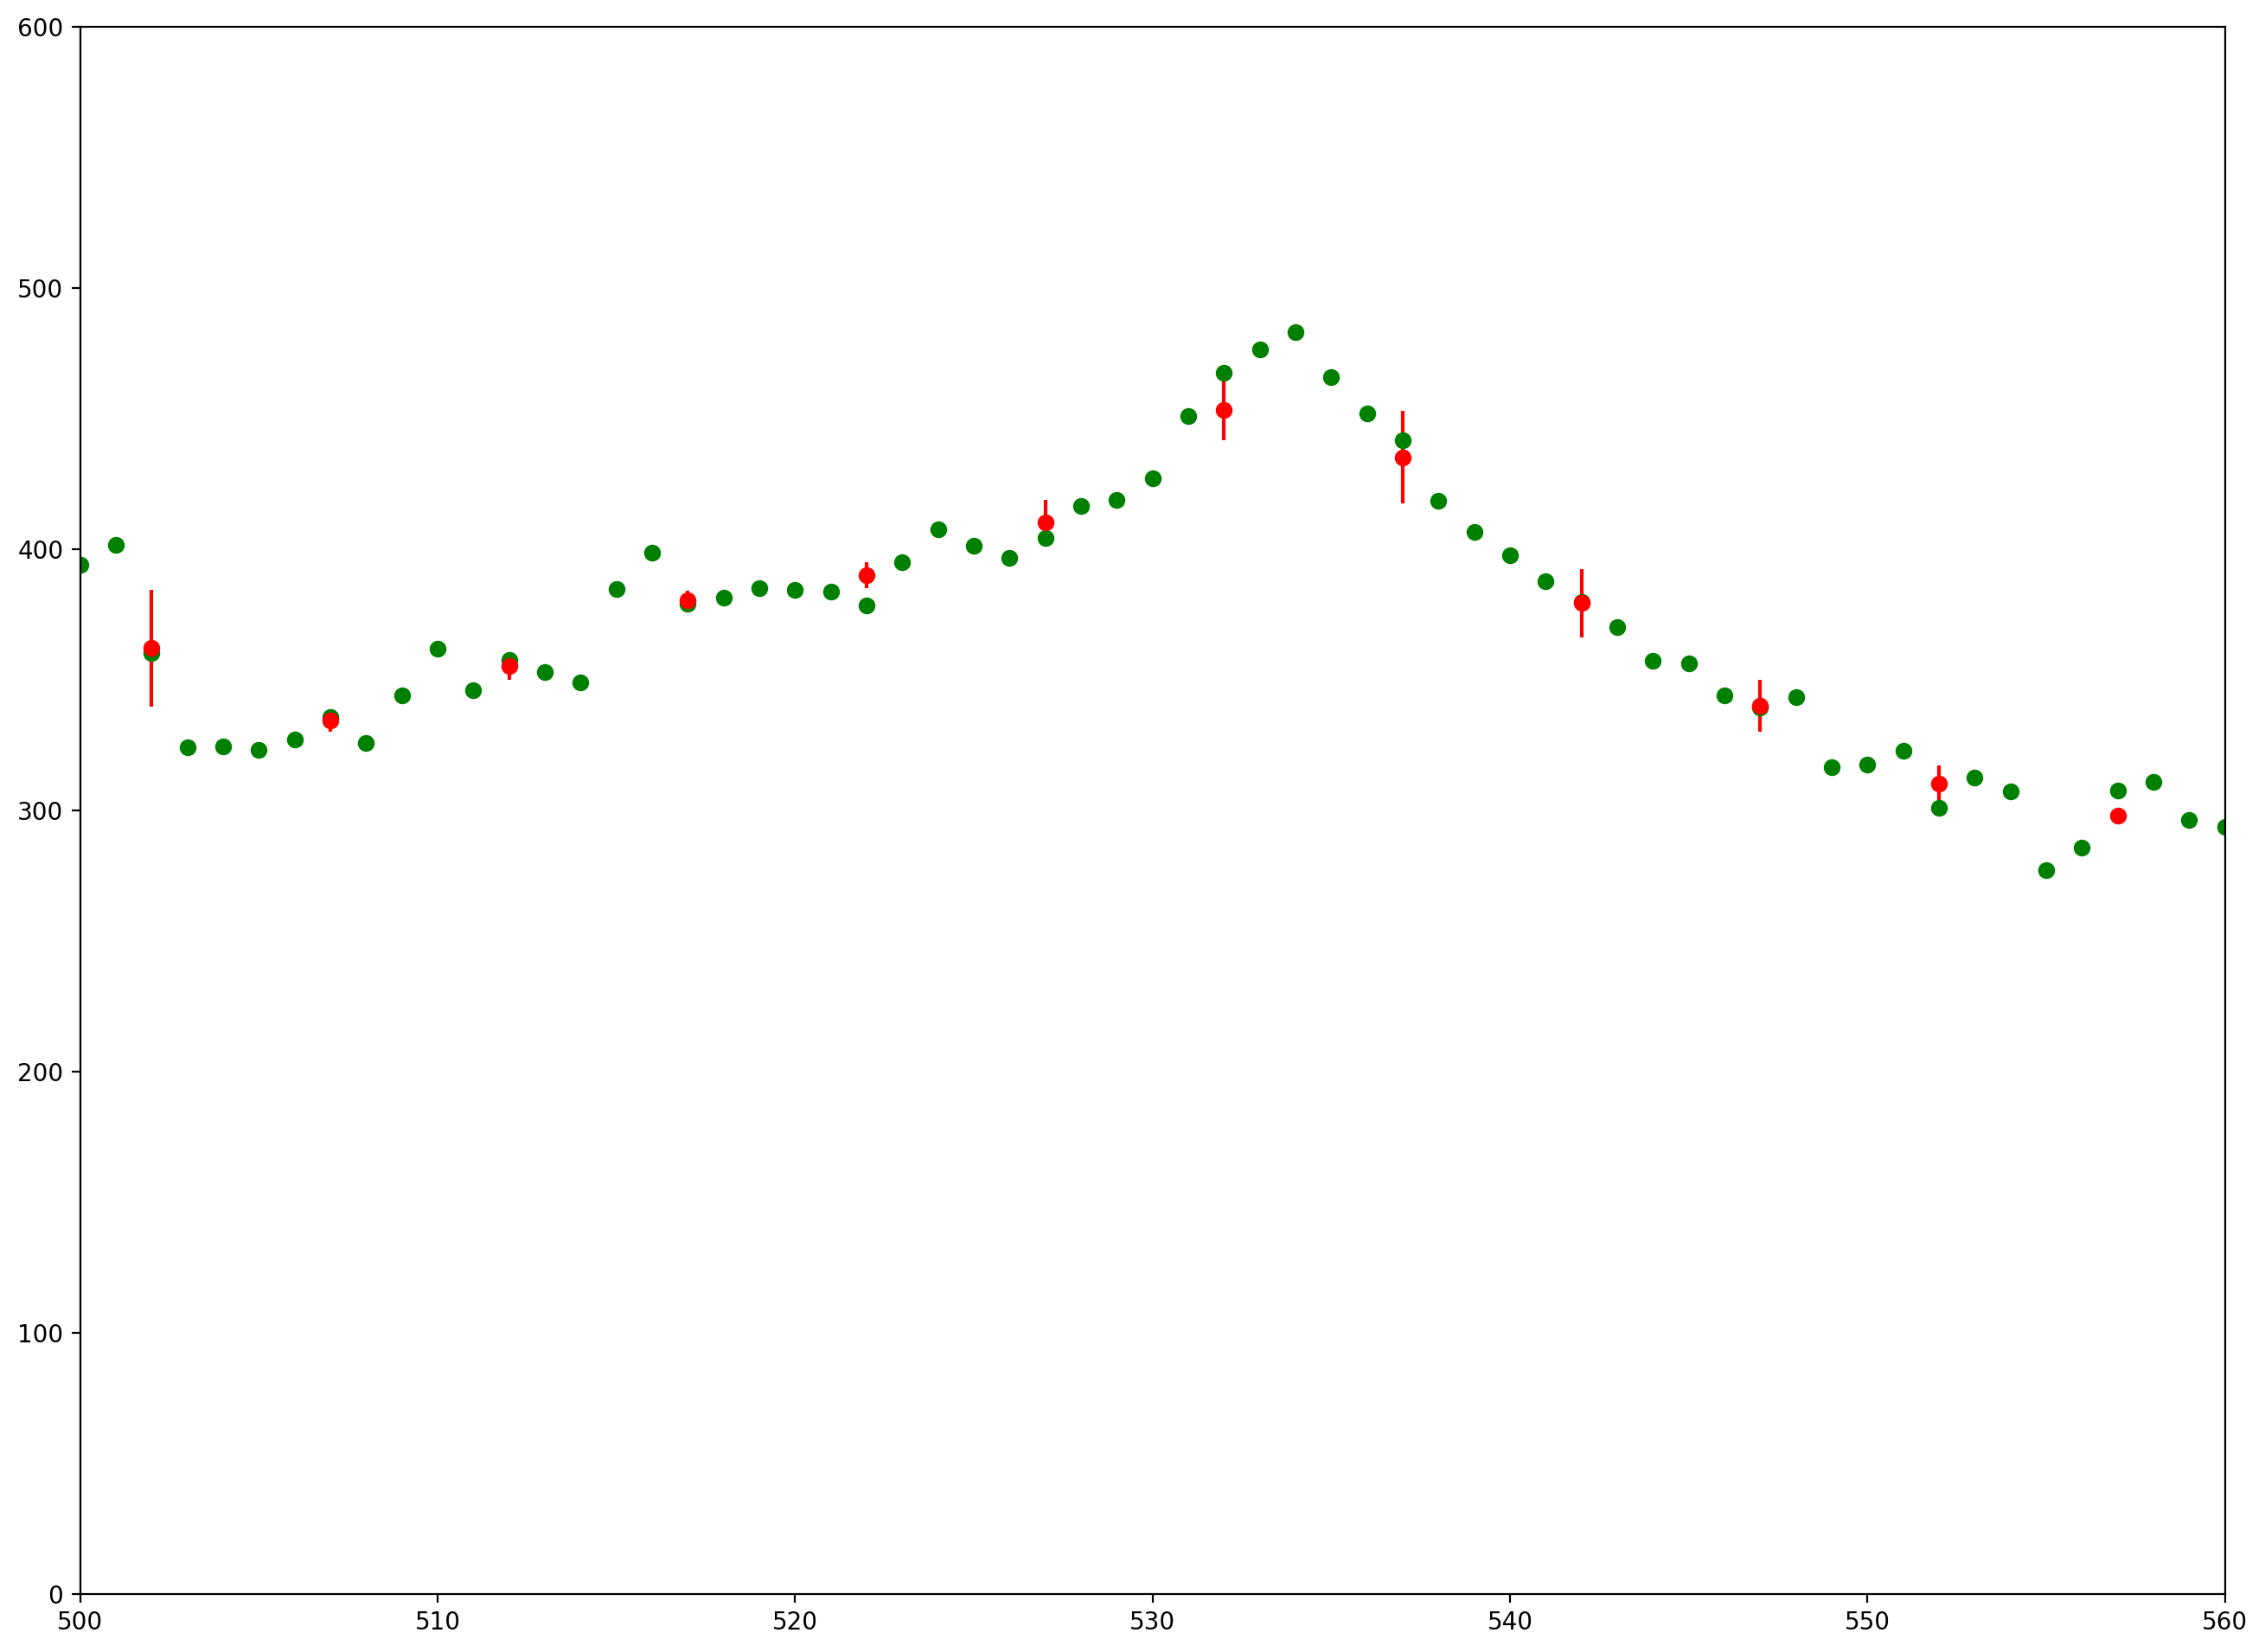

In [25]:
temp = np.array([])
freq = 2 * np.pi * c / specdataE2[:,0] * 1e+9

temp2 = deriv(np.log(x[:,1] * freq** 3 / specdataE2[:, 1]), freq, dw, upw, 5)
temp2 = (hb / k) / temp2
temp2 = temp2[dw:upw]


for ii in range(dw,upw):
    #print(ii)
    temp = np.append(temp, (hb / k) * 1 / ((np.log(x[ii+1, 1] * freq[ii+1] ** 3 / specdataE2[ii+1, 1]) - 
                           np.log(x[ii-1, 1] * freq[ii-1] ** 3 / specdataE2[ii-1, 1]))/ 
                            (freq[ii + 1] - freq[ii-1])))
    #print(temp)
    
print('avg temp', np.average(np.nan_to_num(temp)))

fig, ax = plt.subplots(num=None, figsize=(16, 12), dpi=200, facecolor='w', edgecolor='k')
#ax.plot(specdataE2[dw:upw, 0], temp, linestyle='', marker='o', color='blue')

print('total number of points', specdata2[dw:upw, 0].size)
def avgPlot(xIn, yIn, num):
    while yIn.size%num != 0:
        yIn = yIn[1:]
        xIn = xIn[1:]
    yOut = np.mean(yIn.reshape(-1, num), axis=1)
    xOut = np.mean(xIn.reshape(-1, num), axis=1)
    error = np.std(yIn.reshape(-1, num), axis=1)
    return xOut, yOut, error

wl1, temp1, err1 = avgPlot(specdataE2[dw:upw, 0], temp, 1)
wl2, temp22, err2 = avgPlot(specdataE2[dw:upw, 0], temp2, 5)

ax.errorbar(wl1, temp1, yerr=err1, fmt='-o', linestyle='', color='green')
ax.errorbar(wl2, temp22, yerr=err2, fmt='-o', linestyle='', color='red')

plt.ylim(0, 600)
plt.xlim(500, 560)

In [ ]:
#quantum dots measurements from Mit

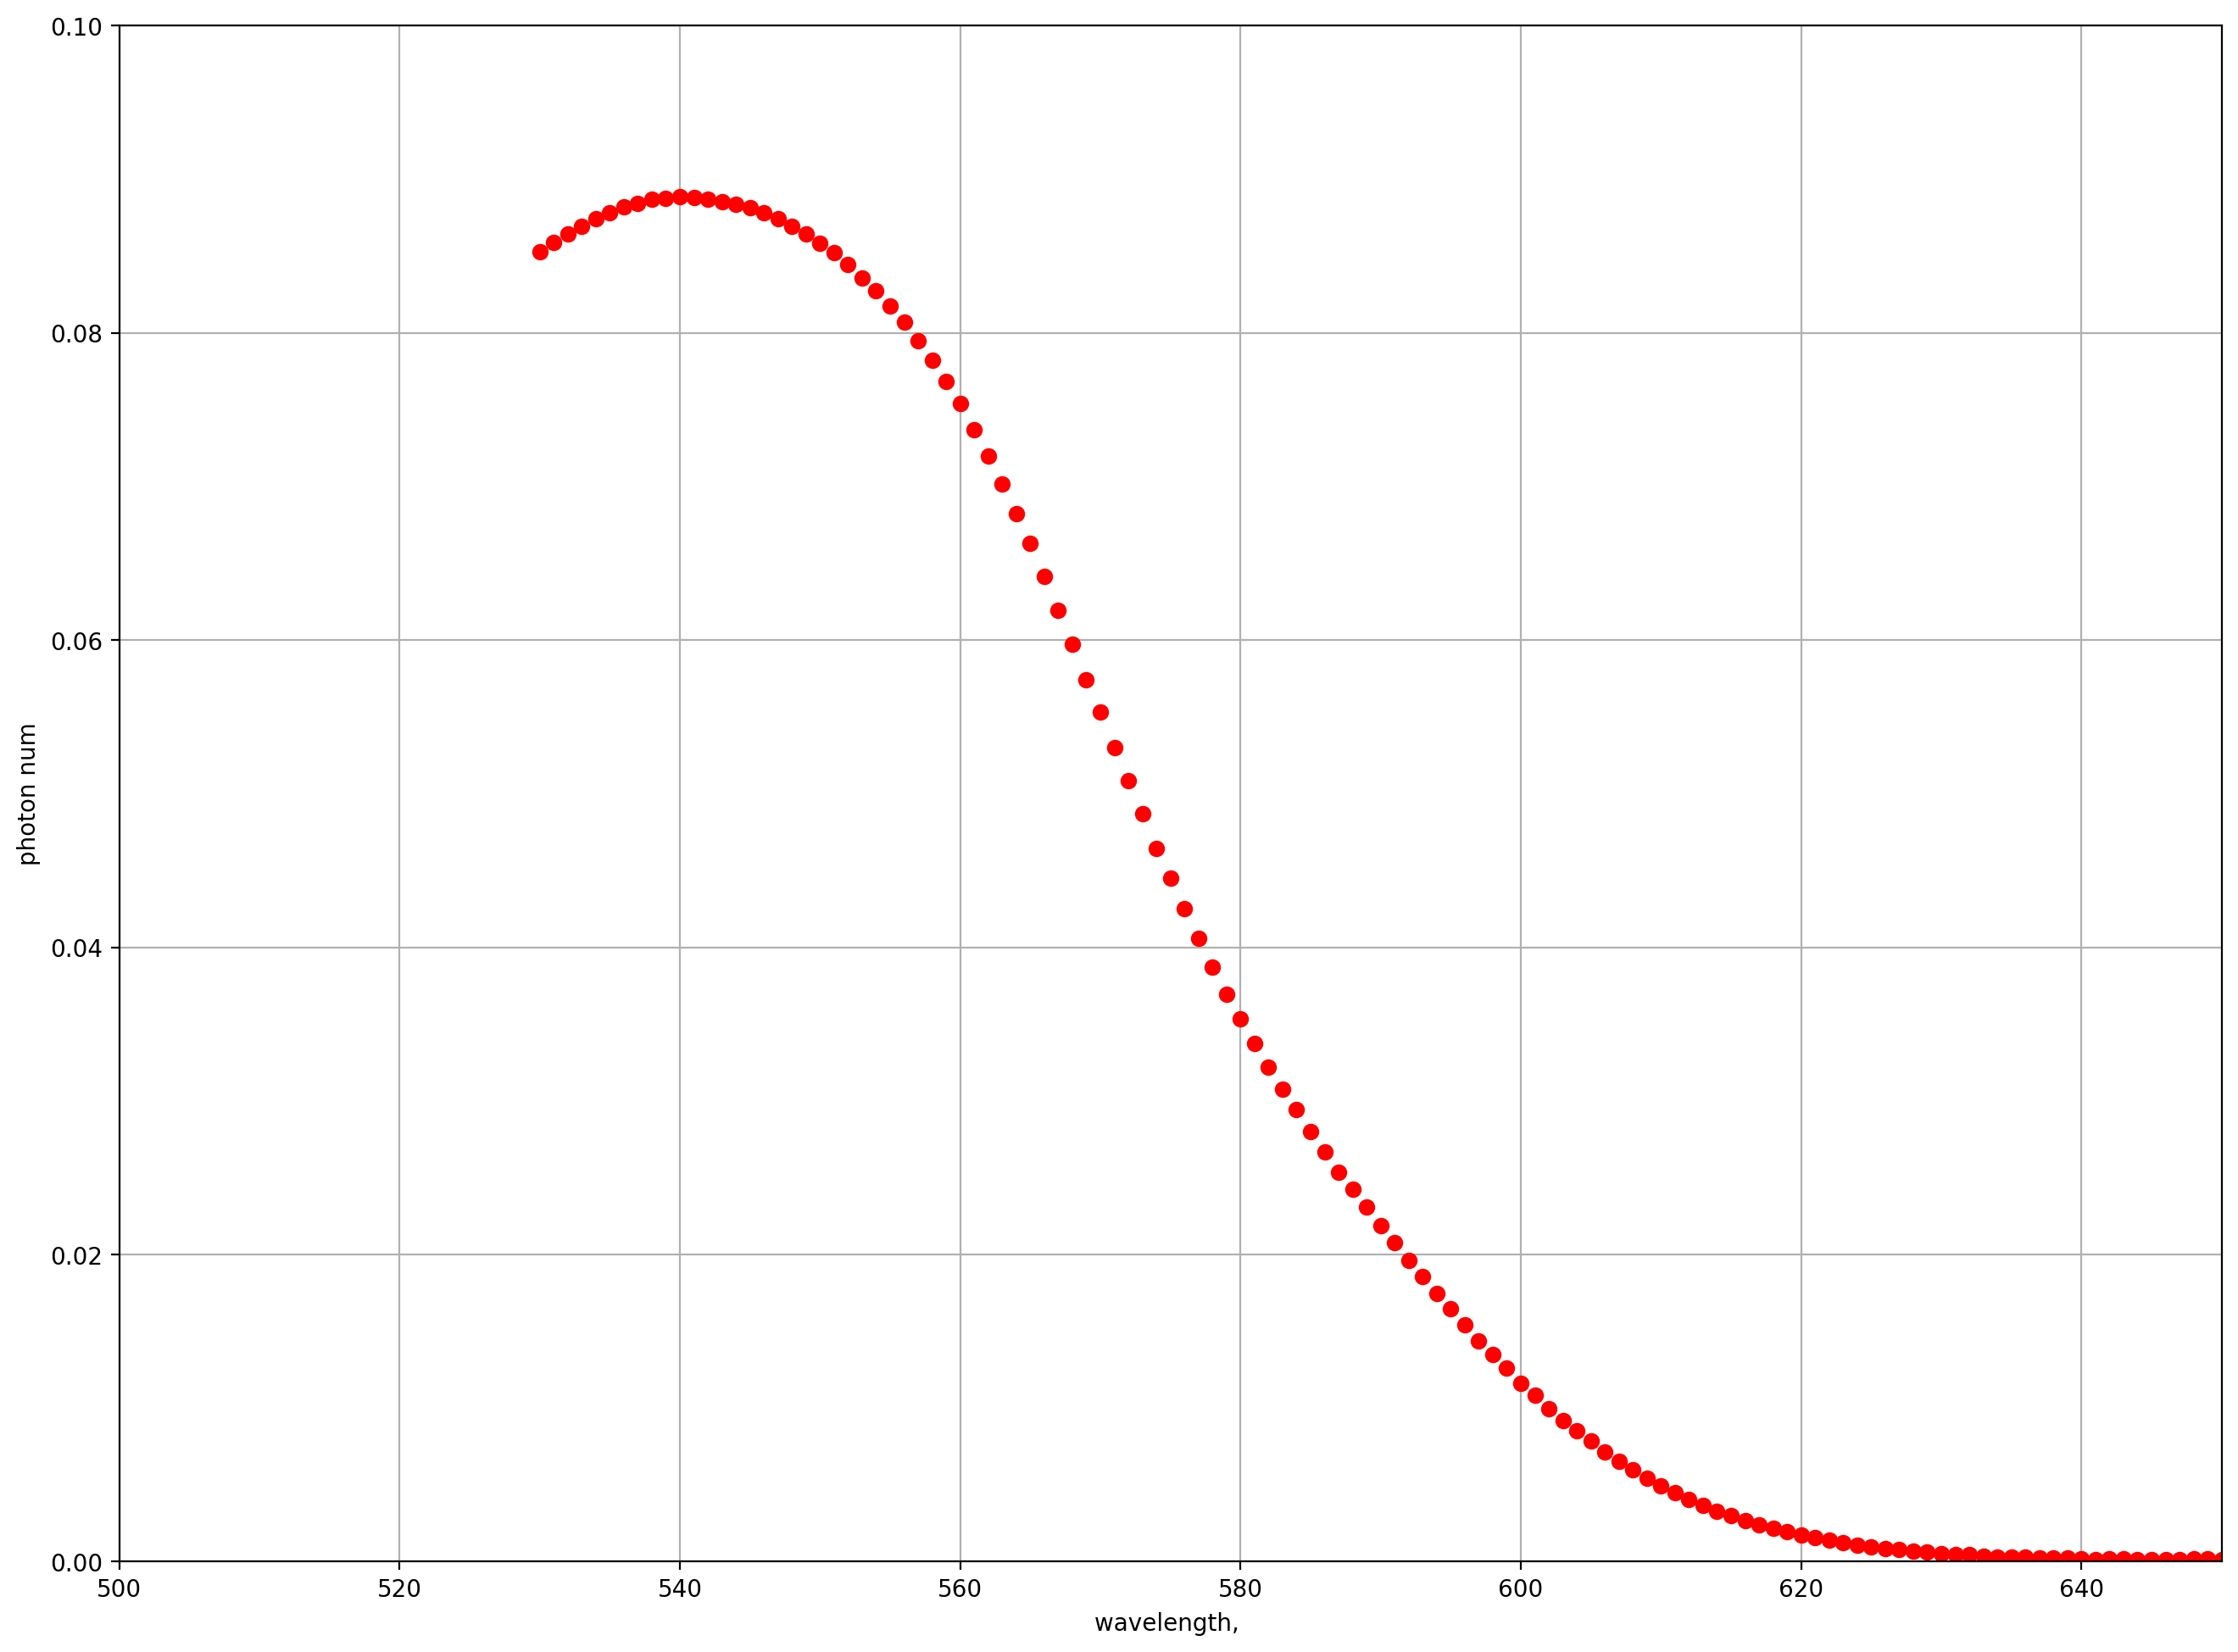

fluor 564.4966405
absorb 540.0


In [67]:
specdataQDA = np.genfromtxt('fromMit/abs_1', delimiter = '\t')
specdataQDF = np.genfromtxt('fromMit/flur_1', delimiter = '\t')
specdataQDA[:,1] = specdataQDA[:,1] + 0.005
#absorption
fig, ax = plt.subplots(num=None, figsize=(16, 12), dpi=200, facecolor='w', edgecolor='k')

#ax.plot(specdataQDF[:,0], specdataQDF[:,1]/max(specdataQDF[:,1]), linestyle='', marker='o', color='blue')

#ax.plot(x[:,0], x[:,1]/max(x[:,1]), linestyle='', marker='o', color='blue')
ax.plot(specdataQDA[:-180,0], specdataQDA[:-180,1], linestyle='', marker='o', color='red')

specdata1 = readSp('qd1_byOffset_2/3.csv', ';')
specdata = readSp('qd1_byOffset_2/1.csv', delimiter = ';')
#ax.errorbar(specdata1[:,0], np.log(specdata[:,1]/specdata1[:,1]) / 20, fmt='-o', linestyle='', color='green')

plt.xlabel('wavelength, ')
plt.ylabel('photon num')
plt.ylim(0, 0.1)
plt.xlim(500, 650)
plt.grid(True)
plt.show()

print('fluor',specdataQDF[np.where(specdataQDF[:,1] == max(specdataQDF[:,1]))[0][0],0])
print('absorb', specdataQDA[np.where(specdataQDA[:,1] == max(specdataQDA[:-180,1]))[0][0],0])


In [50]:
#
x = np.array([[1,1]])
for _ in specdataQDA:
    x = np.append(x, 
                  [specdataQDF[np.where(abs(specdataQDF[:,0] - _[0]) == min(abs(specdataQDF[:,0] - _[0])))[0][0]
                             , :]], axis = 0)
    #print(_[0])
    #print(np.where(abs(specdataE1[:,0] - _[0]) == min(abs(specdataE1[:,0] - _[0])))[0][0])
x = x[1:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


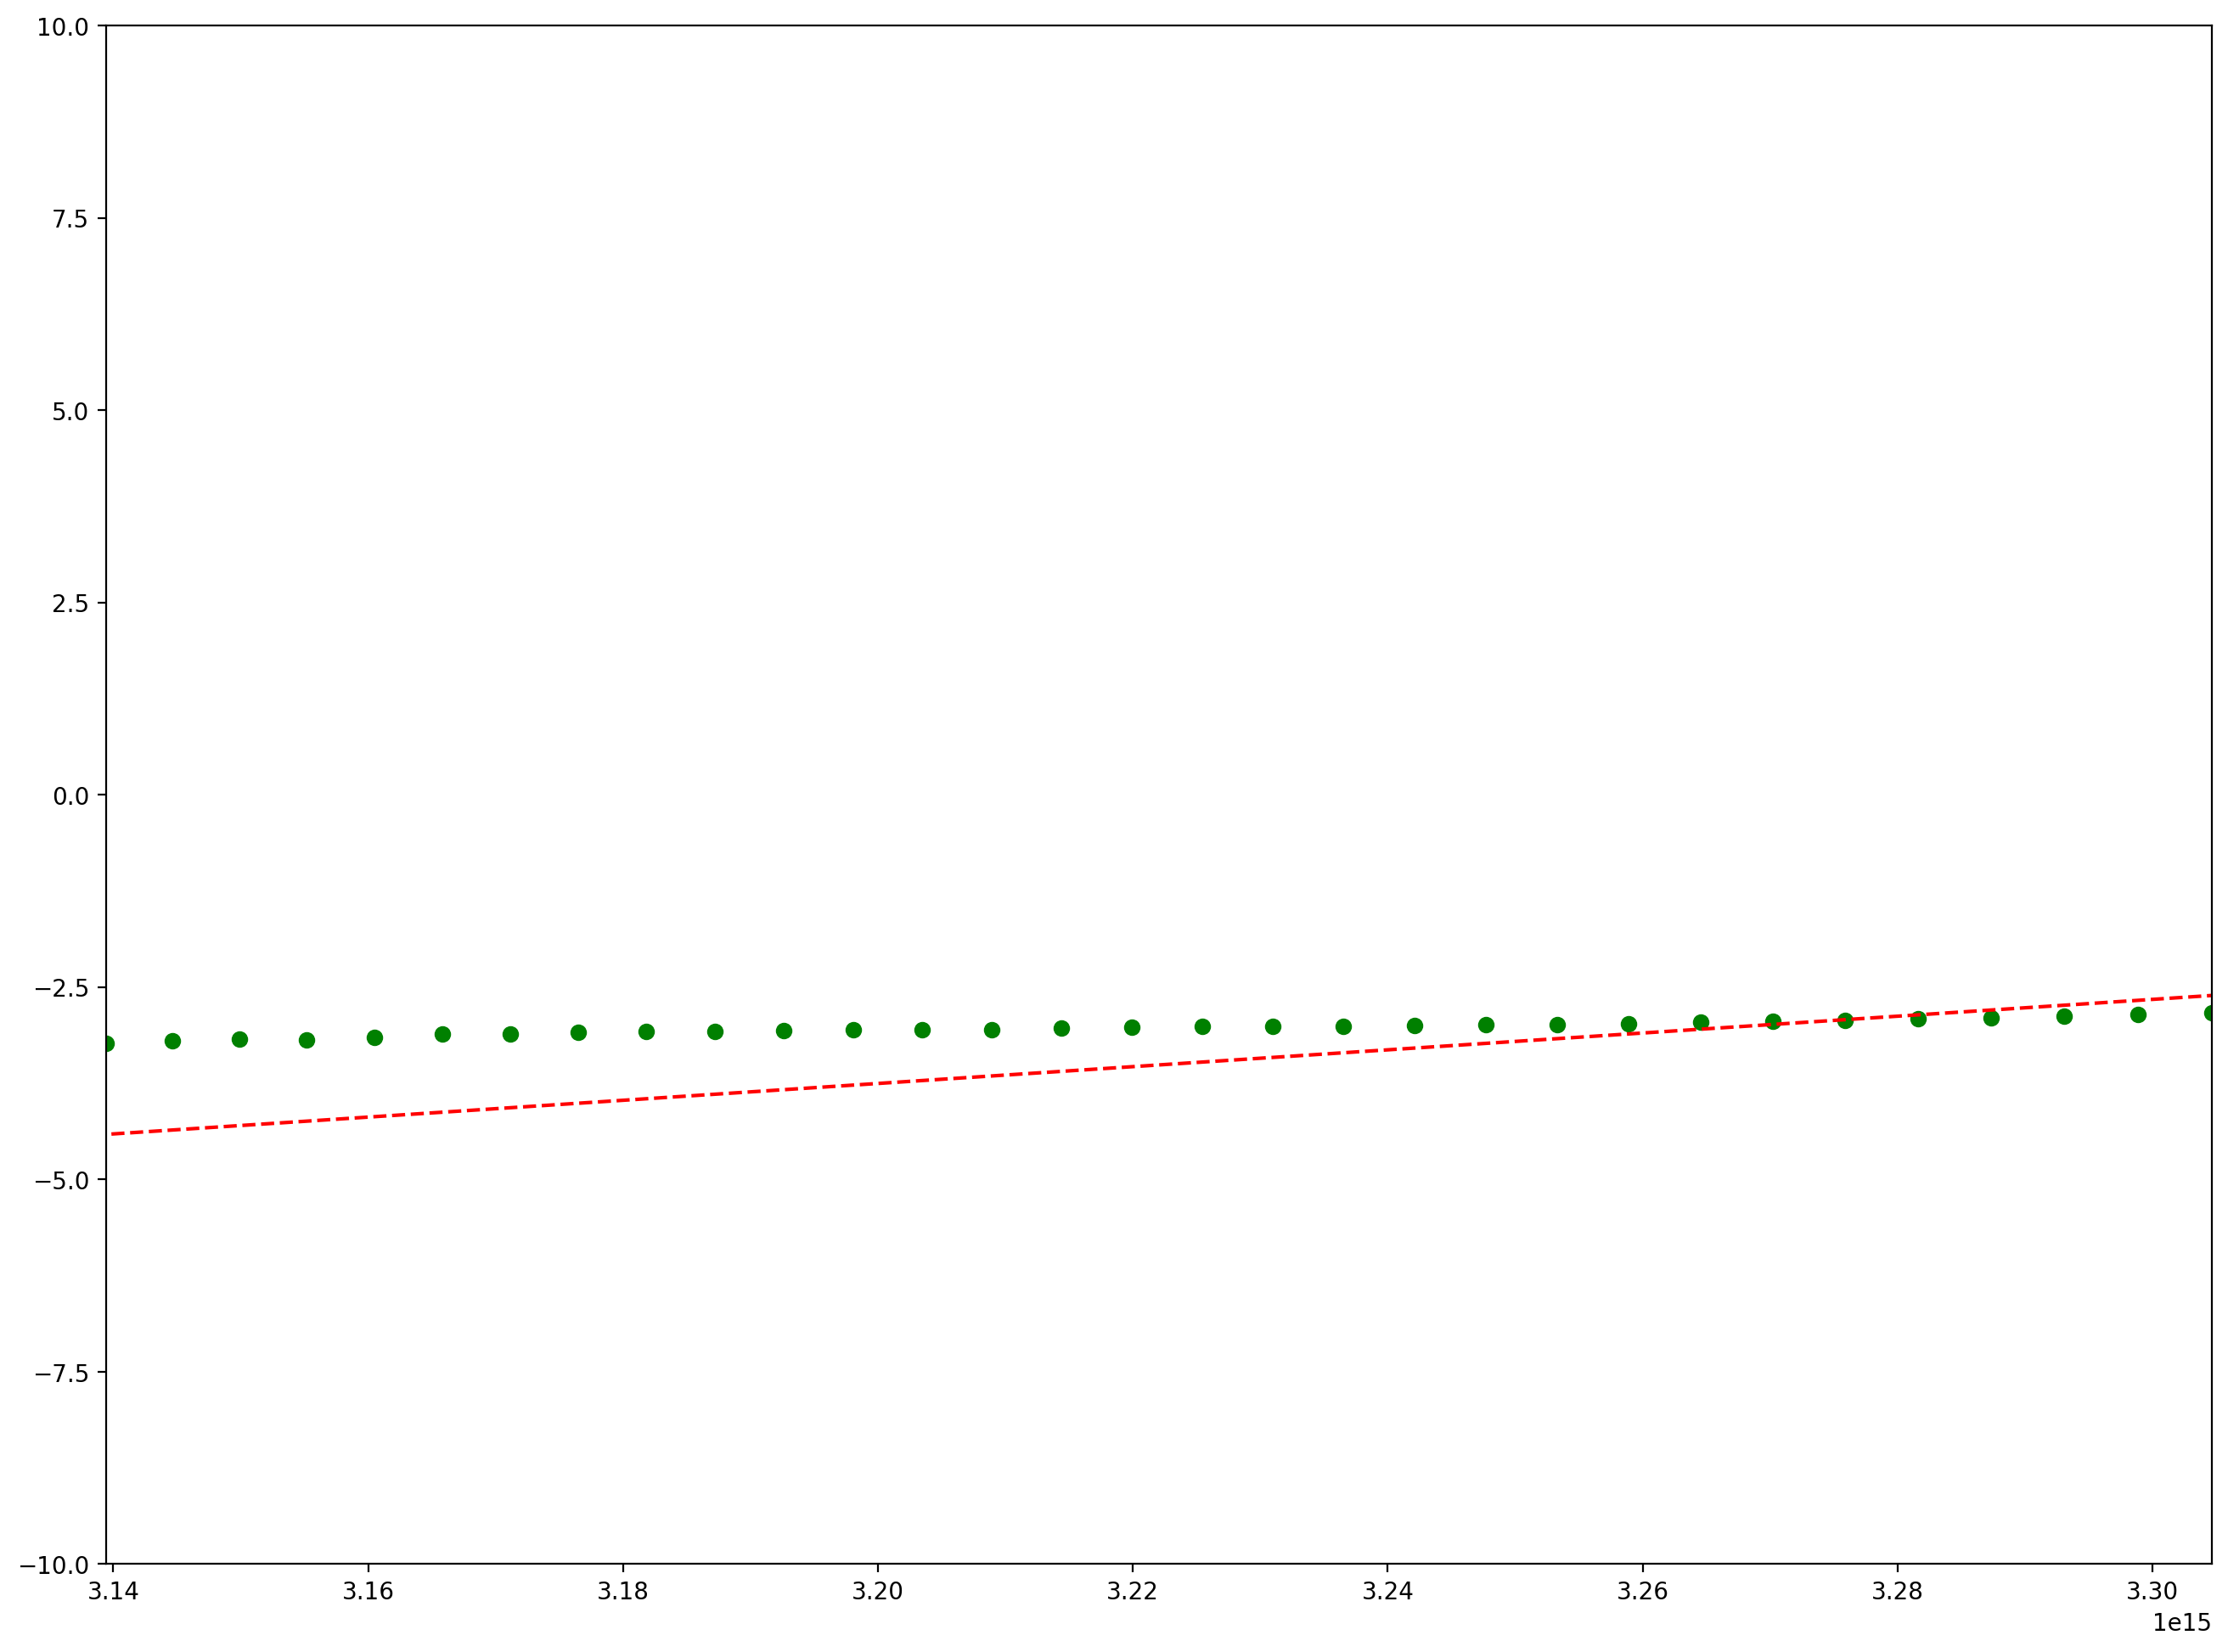

estimated spec temp 698.7397773007231


In [51]:
lolo = np.nan_to_num(np.log(specdataQDA[:,1]/x[:,1]))

dwV = 2 * np.pi * c / 490 * 1e+9
upwV = 2 * np.pi * c / 600 * 1e+9
freq = 2 * np.pi * c / specdataQDA[:,0] * 1e+9

upw = np.where(freq <= upwV)[0][-1] 
dw = np.where(freq >= dwV)[0][0]
def func(x, a, b):
    return x * a + b
popt, pcov = curve_fit(func, freq[upw:dw], np.nan_to_num(lolo[upw:dw]))




fig, ax = plt.subplots(num=None, figsize=(16, 12), dpi=200, facecolor='w', edgecolor='k')
#freq = 2 * np.pi * c / specdataE2[:,0] * 1e+9
ax.plot(freq[:], lolo, linestyle='', marker='o', color='green')
ax.plot(freq[:], func(freq[:], *popt), linestyle='--', marker='', color='red')

#ax.plot(alpha, specdata2[:,1], linestyle='', marker='o', color='blue')
plt.xlim(2 * np.pi * c / 600 * 1e+9, 2 * np.pi * c / 570 * 1e+9)
#plt.xlim(3.4 * 1e+15, 3.5 * 1e+15)
plt.ylim(-10, 10 )
plt.show()


#spec temp
print('estimated spec temp', hb  /(k * popt[0]))

(110,)
avg temp 1221.7711095272944
(110,)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


(300, 5025.5557241933975)

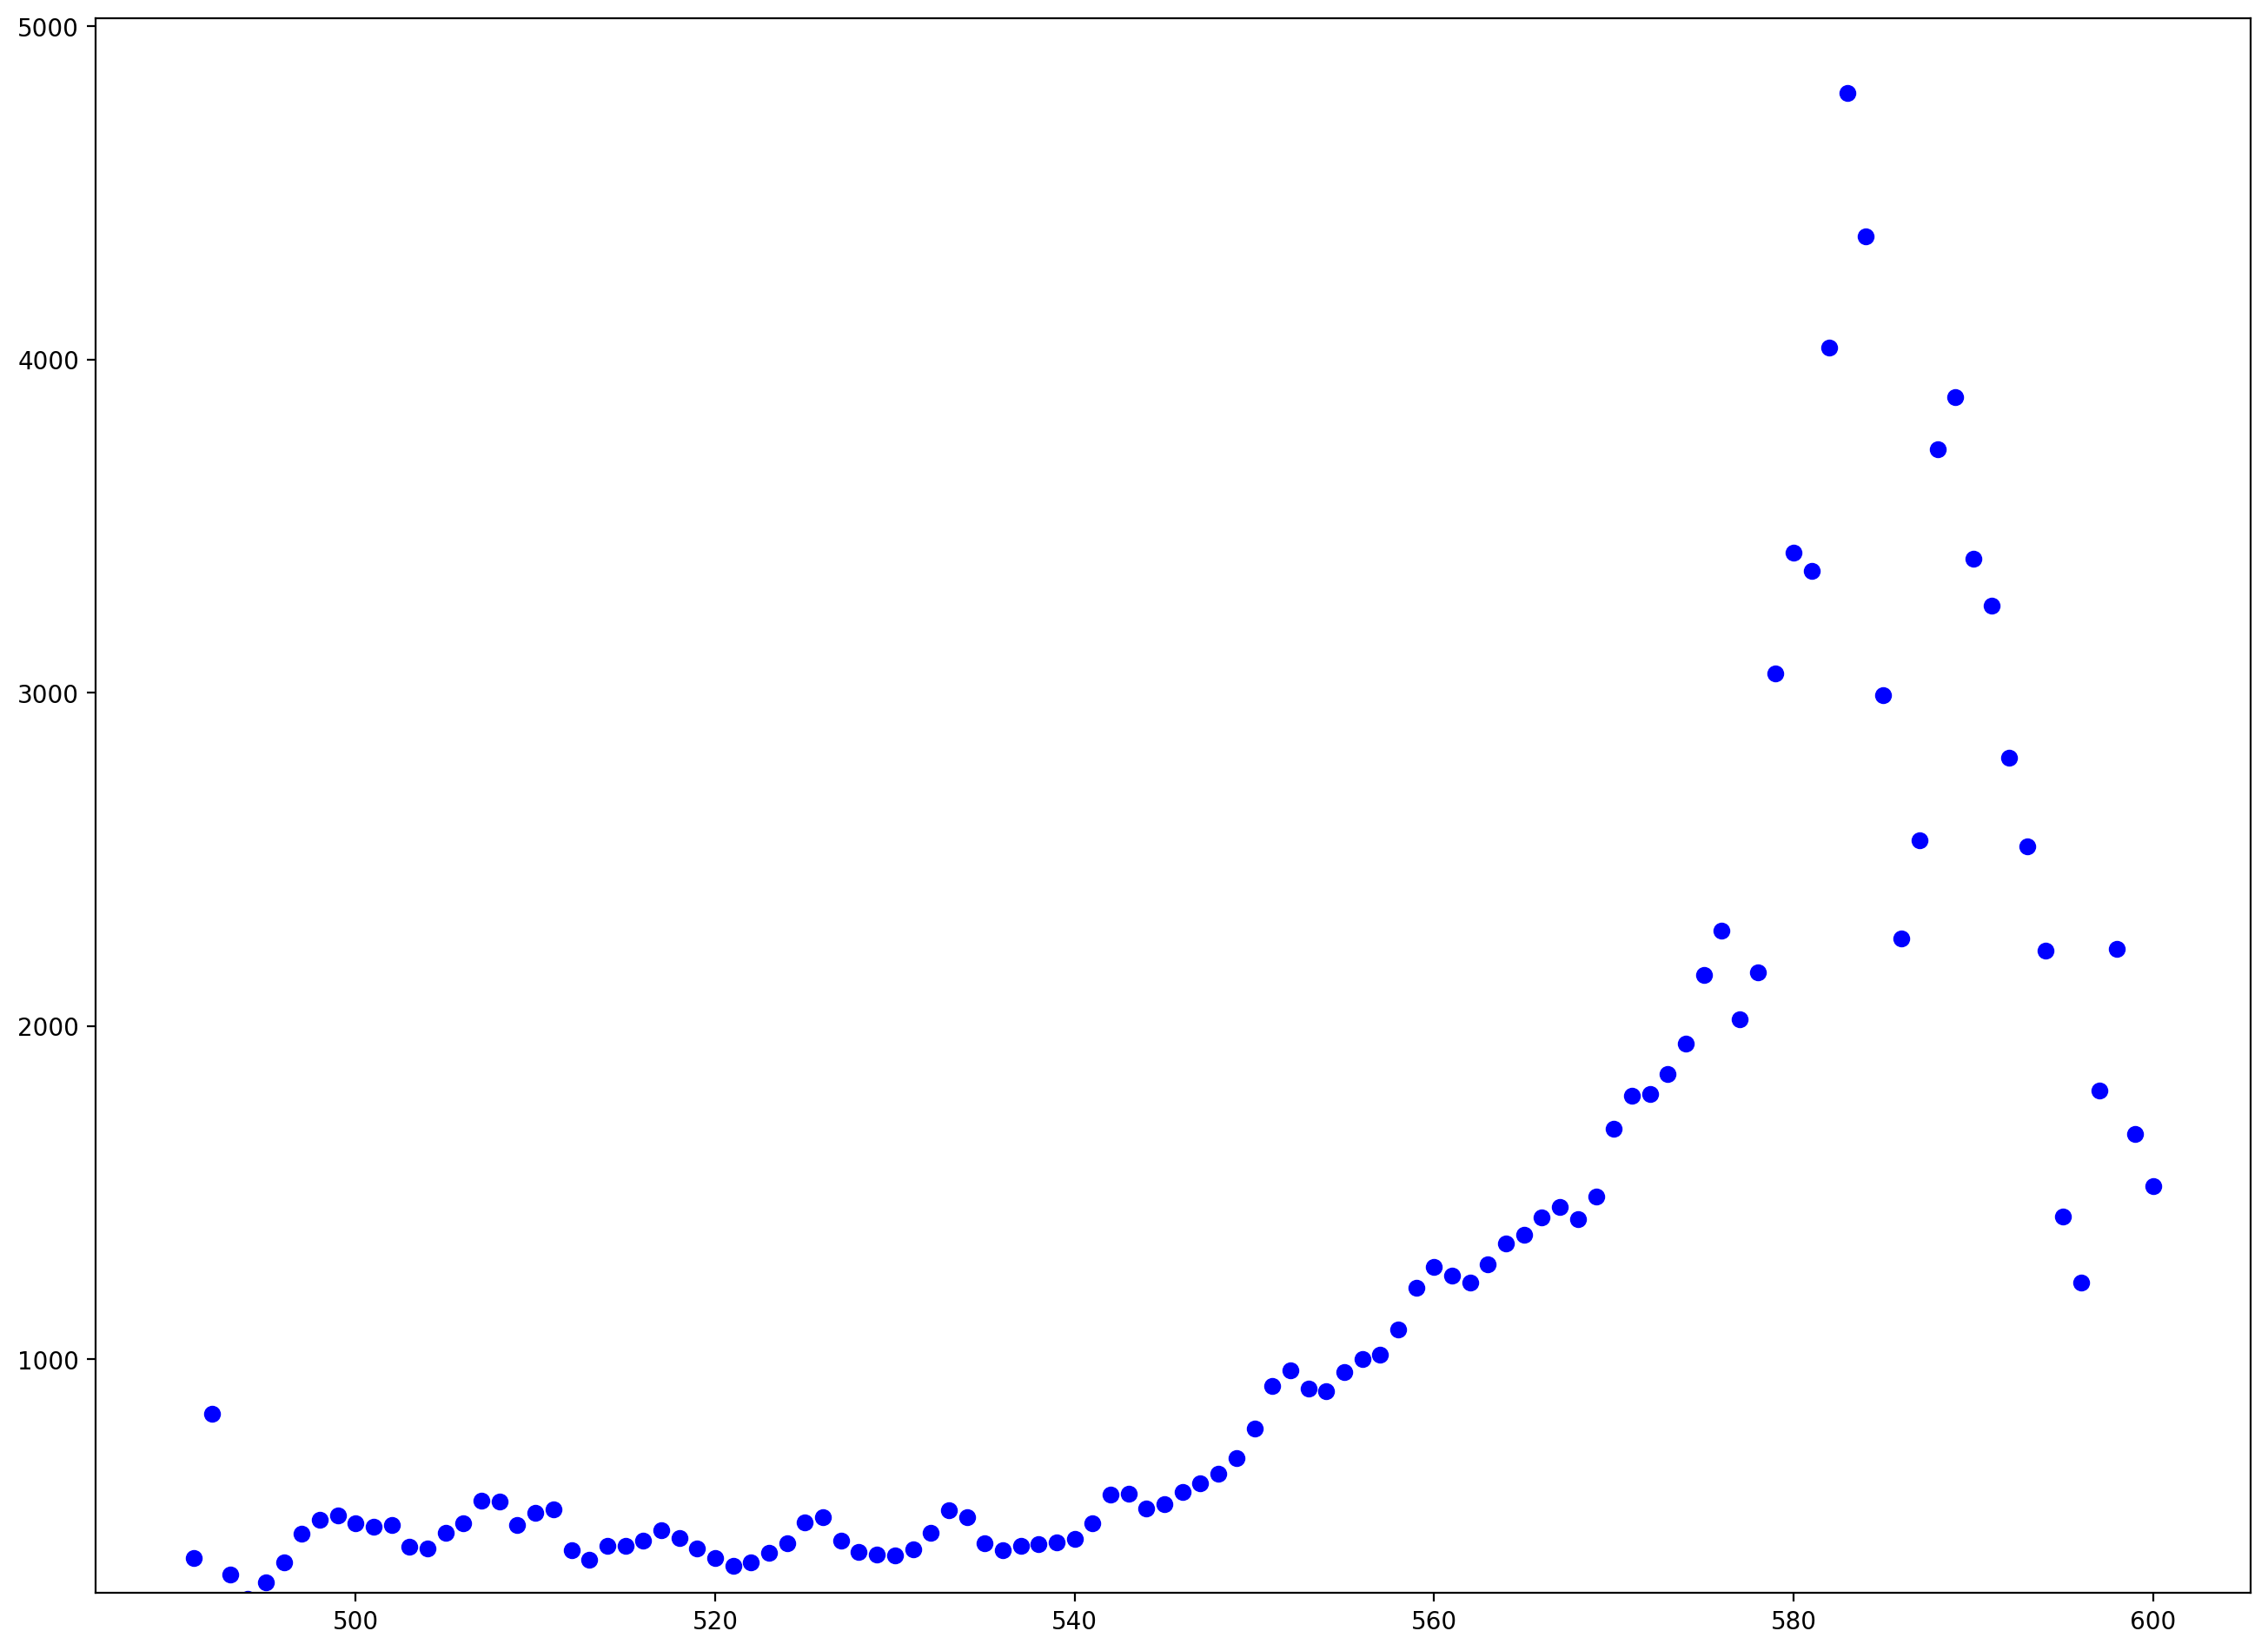

In [52]:
def avgPlot(xIn, yIn, num):
    while yIn.size%num != 0:
        yIn = yIn[1:]
        xIn = xIn[1:]
    yOut = np.mean(yIn.reshape(-1, num), axis=1)
    xOut = np.mean(xIn.reshape(-1, num), axis=1)
    error = np.std(yIn.reshape(-1, num), axis=1)
    return xOut, yOut, error

def deriv(y, x, dBorder, upBorder, avg = 5):
    derivv = np.zeros(y.shape)
    for i in range(dBorder, upBorder):
        #print(i, dBorder, upBorder)
        for j in range(1, avg + 1):
            derivv[i] += (y[i+j] - y[i-j])/(x[i+j] - x[i-j])
        derivv[i] = derivv[i] / avg
    return derivv

temp2 = deriv(np.log(specdataQDA[:,1] * freq** 3 / x[:,1]), freq, upw, dw, 2)
#print(temp2)
temp2 = (hb / k) / temp2

temp2 = temp2[upw:dw]
print(temp2.shape)
temp = np.array([])
freq = 2 * np.pi * c / specdataQDA[:,0] * 1e+9
for ii in range(upw,dw):
    #print(ii)
    temp = np.append(temp, (hb / k) * 1 / ((np.log(specdataQDA[ii+1, 1] * freq[ii+1] ** 3 / x[ii+1, 1]) - 
                           np.log(specdataQDA[ii-1, 1] * freq[ii-1] ** 3 / x[ii-1, 1]))/ 
                            (freq[ii + 1] - freq[ii-1])))
    #print(temp)
    
print('avg temp', np.average(np.nan_to_num(temp)))

wl1, temp22, err2 = avgPlot(specdataQDA[upw:dw, 0], temp2, 1)
print(wl1.shape)
fig, ax = plt.subplots(num=None, figsize=(16, 12), dpi=200, facecolor='w', edgecolor='k')
ax.plot(specdataQDA[upw:dw, 0], temp22, linestyle='', marker='o', color='blue')
plt.ylim(300)
#ax.errorbar(wl1, temp22, yerr=err2, fmt='-o', linestyle='', color='red')


#plt.xlim(540)

In [12]:
import csv
with open('tempMitqd1.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=';',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    ii = -1
    for _ in temp22:
        ii += 1
        spamwriter.writerow([wl1[ii], _])